# Retail Pricing Model

June 14, 2019

## 1 Introduction

This is a Pricing Model based in Python that ensures the figures can be audited and anyone can obtain figures for their needs. The codes can also be hidden to be readily able to be disseminated. This process document seeks to outline the steps required to obtain the final figure.

## 2 Guide

- Input by year section are all the metrics that changes from year to year
- The demand input section determined using a load factor % which is different depending on the customer usage and load profile (you will need to go to section 4 to toggle on to see the raw codes in order to change this)
- TOU usage splits are the load % by peak, shoulder, off-peak of the usage input cell (for a flat user) for an average customer (you will need to go to section 4 to toggle on to see the raw codes in order to change this)

## 3 Instructions

1. If the usage you are analysis is not between 3500kWh and 4500kWh, Go section 4, click on toggle on to change the load factor % in the raw code
2. Click on the "Cell" Menu and hit "Run All"
3. Input value into the correct format as they appear
4. Stand back and admire

## 4 Setting Up Model

In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true;

   
function code_toggle(_this) {

var divs =  document.querySelectorAll(".input")[0];
console.log(divs)

 if (code_show){

 $('div .input').hide();
 } else {
 $('div .input').show();
 
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle($(this))"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [2]:
from bokeh.plotting import figure, show
from bokeh.io import output_notebook
from bokeh.models import ColumnDataSource, LabelSet
from bokeh.models.formatters import NumeralTickFormatter
import numpy as np
import pandas as pd
%matplotlib notebook
output_notebook()

from ipywidgets import IntProgress
from IPython.display import display
import time

max_count = 100

f = IntProgress(min=0, max=max_count) # instantiate the bar
display(f) # display the bar

count = 0
while count <= max_count:
    f.value += 1 # signal to increment the progress bar
    time.sleep(.1)
    count += 1

Loading BokehJS ...

IntProgress(value=0)

# 5 Regularity of Input Updates

In [3]:
# Create the initial dataframe
data = {'dimensions': ['usage','demand','cost/retail price of solar and battery','wholesale','greens compliance','TLF and DLF','NEM+Ancillary Fee','TOU Splits','Ausgrid Tariffs','CPI Tab'],
        'frequency': ['once/month','once/month','as needed','once/month','when available(yearly)','when available','when updated','as required','when available (yearly)','when available (quarterly)'],
       'reason': ['Due to seasonality and more updated data','Due to seasonality and more updated data','where products are refreshed/updated','wholesale cost affected or volatile market','updated greens cost on new compliance','wholesale/greens cost can be affected','wholesale cost will be affected','customer energy use will shift over time and will need to account financial determination','Change in network costs/competitor price are a determinant and required to submit new prices to AER','affect future OPEX cost. See instructions on tab']
                       }
df_regularity = pd.DataFrame(data)
df_regularity

,dimensions,frequency,reason
0,usage,once/month,Due to seasonality and more updated data
1,demand,once/month,Due to seasonality and more updated data
2,cost/retail price of solar and battery,as needed,where products are refreshed/updated
3,wholesale,once/month,wholesale cost affected or volatile market
4,greens compliance,when available(yearly),updated greens cost on new compliance
5,TLF and DLF,when available,wholesale/greens cost can be affected
6,NEM+Ancillary Fee,when updated,wholesale cost will be affected
7,TOU Splits,as required,customer energy use will shift over time and w...
8,Ausgrid Tariffs,when available (yearly),Change in network costs/competitor price are a...
9,CPI Tab,when available (quarterly),affect future OPEX cost. See instructions on tab


## 5 Inputs

This section contains all the inputs required to make all the calculations to determine the profitability of a tariff or product (go to the top of section 4 and click toggle on to see raw codes to make changes).

# 6 Custom Inputs for selected usage and tariff

In [4]:
##Key Inputs###
Usage = int(input("What is the total usage you want to analyse? (Enter in kWh with no commas or decimals)"))
Discount = 0.0
Rebate = 0
LoadFlex = 0.35
TariffChoice = input("What tariff do you want to analyse? (Enter EA010/EA025/EA115/EA116 /case sensitive)")
ResidentialDemandHighSeasonLF = 0.26
ResidentialDemandLowSeasonLF = 0.284

###Days in Year###
Jan = 31
FebNL = 28
FebL = 29
Mar = 31
Apr = 30
May = 31
Jun = 30
Jul = 31
Aug = 31
Sep = 30
Oct = 31
Nov = 30
Dec = 31

###Max Demand###
FlatLoad = Usage/8760
ResidentialMaxDemandHighNL = (FlatLoad/ResidentialDemandHighSeasonLF) * (Jan + FebNL + Mar + Jun + Jul + Aug + Nov + Dec)
ResidentialMaxDemandHighL = (FlatLoad/ResidentialDemandHighSeasonLF) * (Jan + FebL + Mar + Jun + Jul + Aug + Nov + Dec)
ResidentialMaxDemandLow = (FlatLoad/ResidentialDemandLowSeasonLF) * (Apr + May + Sep + Oct)

###Input by Year###
##2018##
#Greens#
LRECCompliance = 0.1606
SRECCompliance = 0.1708
ESCCompliance = 0.08
LRECPrice = 37.05
STCPrice = 36.5
ESCPrice = 20.8

##Wholesale#
NEM2018 = 1.04
TLF2018 = 1.0043
DLF2018 = 1.0467
Wholesale2018 = 72.39
WholesaleFlex2018 = Wholesale2018 * (1 + LoadFlex)

##2019##
#Greens#
LRECCompliance2019 = 0.1930
SRECCompliance2019 = 0.2173
ESCCompliance2019 = 0.085
LRECPrice2019 = 32.7500
STCPrice2019 = 36.5500
ESCPrice2019 = 20.9500

##Wholesale#
NEM2019 = 1.1009
TLF2019 = 1.0034
DLF2019 = 1.0490
Wholesale2019 = 90.02
WholesaleFlex2019 = Wholesale2019 * (1 + LoadFlex)

###Usage Profile###
ResidentialFlatPercent = 1
ResidentialPeakPercent = 0.1397
ResidentialShoulderPercent = 0.3398
ResidentialOffpeakPercent = 0.5205
ResidentialPeakControlledPercent = 0.0929
ResidentialShoulderControlledPercent = 0.3090
ResidentialOffpeakControlledPercent = 0.5981

###Tariffs Section###
##2018##
#EA010 Residential non-TOU closed#
ea010NAC2018 = 36.452 + 8.0766
ea010NetworkVariableFlat2018 =  10.1484
ea010RetailFixed2018 = 92.4
ea010RetailVariableFlat2018 =  31.79

#EA025 Residential TOU#
ea025NAC2018 = 45.234 + 12.8821
ea025NetworkVariablePeak2018 =  24.8496
ea025NetworkVariableShoulder2018 =  6.4415
ea025NetworkVariableOffpeak2018 =  2.5500
ea025RetailFixed2018 = 105.6
ea025RetailVariablePeak2018 =  59.2900
ea025RetailVariableShoulder2018 =  25.2500
ea025RetailVariableOffpeak2018 =  16.4500

#EA115 Residential Demand TOU#
ea115NAC2018 = 46.0410
ea115NetworkVariablePeak2018 =  23.5007
ea115NetworkVariableShoulder2018 =  3.7765
ea115NetworkVariableOffpeak2018 = 2.7360
ea115NetworkDemandHigh2018 = 4.0714
ea115NetworkDemandLow2018 = 4.0714
ea115RetailFixed2018 = 107.845
ea115RetailVariablePeak2018 =  60.55
ea115RetailVariableShoulder2018 =  25.787
ea115RetailVariableOffpeak2018 =  16.8000
ea115RetailDemandHigh2018 = 4.0714
ea115RetailDemandLow2018 = 4.0714

#EA116 Residential Demand#
ea116NAC2018 = 37.1024
ea116NetworkVariablePeak2018 =  2.7416
ea116NetworkVariableShoulder2018 =  2.7416
ea116NetworkVariableOffpeak2018 = 2.7416
ea116NetworkDemandHigh2018 = 20.357
ea116NetworkDemandLow2018 = 10.178
ea116RetailFixed2018 = 107.845
ea116RetailVariablePeak2018 =  60.55
ea116RetailVariableShoulder2018 =  25.787
ea116RetailVariableOffpeak2018 =  16.8000
ea116RetailDemandHigh2018 = 20.357
ea116RetailDemandLow2018 = 10.178

#Controlled Load Tariff#
CL1NAC2018 = 0.1508 + ((8.67+0.92)/365/100)
CL2NAC2018 = 11.0480 + ((8.67+0.92)/365/100)
CL1CL2NAC2018 = CL1NAC2018 + CL2NAC2018
CL1NetworkVariable2018 = 1.7522
CL2NetworkVariable2018 = 4.6267
CL1CL2NetworkVariable2018 = CL1NetworkVariable2018 + CL2NetworkVariable2018
CL1RetailVariable2018 = 15.3360
CL2RetailVariable2018 = 15.3360

##2019##
#EA010 Residential non-TOU closed#
ea010NAC2019 = 37.1024 + ((15.62+10.89)/365)*100
ea010NetworkVariableFlat2019 =  8.2177
ea010RetailFixed2019 = 85.7860
ea010RetailVariableFlat2019 = 26.1640

#EA025 Residential TOU#
ea025NAC2019 = 46.0410 + ((17.38+28.15)/365)*100
ea025NetworkVariablePeak2019 =  23.5007
ea025NetworkVariableShoulder2019 =  5.4892
ea025NetworkVariableOffpeak2019 =  3.5087
ea025RetailFixed2019 = 100.0000
ea025RetailVariablePeak2019 =  56.4640
ea025RetailVariableShoulder2019 =  24.6450
ea025RetailVariableOffpeak2019 =  16.4640

#EA115 Residential Demand TOU#
ea115NAC2019 = 46.0410
ea115NetworkVariablePeak2019 =  23.5007
ea115NetworkVariableShoulder2019 =  3.7765
ea115NetworkVariableOffpeak2019 = 2.7360
ea115NetworkDemandHigh2019 = 4.0714
ea115NetworkDemandLow2019 = 4.0714
ea115RetailFixed2019 = 107.845
ea115RetailVariablePeak2019 =  60.55
ea115RetailVariableShoulder2019 =  25.787
ea115RetailVariableOffpeak2019 =  16.8000
ea115RetailDemandHigh2019 = 4.0714
ea115RetailDemandLow2019 = 4.0714

#EA116 Residential Demand#
ea116NAC2019 = 37.1024
ea116NetworkVariablePeak2019 =  2.7416
ea116NetworkVariableShoulder2019 =  2.7416
ea116NetworkVariableOffpeak2019 = 2.7416
ea116NetworkDemandHigh2019 = 20.3568
ea116NetworkDemandLow2019 = 10.1784
ea116RetailFixed2019 = 107.845
ea116RetailVariablePeak2019 =  60.55
ea116RetailVariableShoulder2019 =  25.787
ea116RetailVariableOffpeak2019 =  16.8000
ea116RetailDemandHigh2019 = 20.357
ea116RetailDemandLow2019 = 10.178


#Controlled Load Tariff
CL1NAC2019 = 0.1508 + ((8.67+0.92)/365/100)
CL2NAC2019 = 11.0480 + ((8.67+0.92)/365/100)
CL1CL2NAC2019 = CL1NAC2019 + CL2NAC2019
CL1NetworkVariable2019 = 1.7522
CL2NetworkVariable2019 = 4.6267
CL1CL2NetworkVariable2019 = CL1NetworkVariable2019 + CL2NetworkVariable2019
CL1RetailVariable2019 = 15.3360
CL2RetailVariable2019 = 15.3360

What is the total usage you want to analyse? (Enter in kWh with no commas or decimals)3900
What tariff do you want to analyse? (Enter EA010/EA025/EA115/EA116 /case sensitive)EA010


In [5]:
def GM2018():
    if TariffChoice == "EA010":
        NetworkRevenue = ea010RetailFixed2018/100*365 + Usage * ea010RetailVariableFlat2018/100
        NetworkCost = ea010NAC2018/100*365 + Usage * (ea010NetworkVariableFlat2018/100)
        WholesaleCost = (Usage/1000) * (WholesaleFlex2018 + NEM2018) * TLF2018 * DLF2018
        GreensCost = ((Usage/1000) * (LRECCompliance * LRECPrice) * TLF2018 * DLF2018) + ((Usage/1000) * (SRECCompliance * STCPrice) * TLF2018 * DLF2018) + ((Usage/1000) * (ESCCompliance * ESCPrice) * TLF2018 * DLF2018)
        print ("2018 Residential non-TOU GM is", round((NetworkRevenue - NetworkCost - WholesaleCost - GreensCost),2))
    elif TariffChoice == "EA025":
        NetworkRevenue = ea025RetailFixed2018/100*365 + Usage * ResidentialPeakPercent * (ea025RetailVariablePeak2018/100) + Usage * ResidentialShoulderPercent * (ea025RetailVariableShoulder2018/100) + Usage * ResidentialOffpeakPercent * (ea025RetailVariableOffpeak2018/100)
        NetworkCost = ea025NAC2018/100*365 + Usage * ResidentialPeakPercent * (ea025NetworkVariablePeak2018/100) + Usage * ResidentialShoulderPercent * (ea025NetworkVariableShoulder2018/100) + Usage * ResidentialOffpeakPercent * (ea025NetworkVariableOffpeak2018/100)
        WholesaleCost = (Usage/1000) * (WholesaleFlex2018 + NEM2018) * TLF2018 * DLF2018
        GreensCost = ((Usage/1000) * (LRECCompliance * LRECPrice) * TLF2018 * DLF2018) + ((Usage/1000) * (SRECCompliance * STCPrice) * TLF2018 * DLF2018) + ((Usage/1000) * (ESCCompliance * ESCPrice) * TLF2018 * DLF2018)
        print ("2018 Residential TOU GM is", round((NetworkRevenue - NetworkCost - WholesaleCost - GreensCost),2))
    elif TariffChoice == "EA115":
        NetworkRevenue = ea115RetailFixed2019/100*365 + Usage * ResidentialPeakPercent * (ea115RetailVariablePeak2019/100) + Usage * ResidentialShoulderPercent * (ea115RetailVariableShoulder2019/100) + Usage * ResidentialOffpeakPercent * (ea115RetailVariableOffpeak2019/100) + ResidentialMaxDemandHighNL * (ea115RetailDemandHigh2019/100) + ResidentialMaxDemandLow * (ea115RetailDemandLow2019/100) 
        NetworkCost = ea115NAC2019/100*365 + Usage * ResidentialPeakPercent * (ea115NetworkVariablePeak2019/100) + Usage * ResidentialShoulderPercent * (ea115NetworkVariableShoulder2019/100) + Usage * ResidentialOffpeakPercent * (ea115NetworkVariableOffpeak2019/100) + ResidentialMaxDemandHighNL * (ea115NetworkDemandHigh2019/100) + ResidentialMaxDemandLow * (ea115NetworkDemandLow2019/100)
        WholesaleCost = (Usage/1000) * (WholesaleFlex2019 + NEM2019) * TLF2019 * DLF2019
        GreensCost = ((Usage/1000) * (LRECCompliance * LRECPrice) * TLF2019 * DLF2019) + ((Usage/1000) * (SRECCompliance * STCPrice) * TLF2019 * DLF2019) + ((Usage/1000) * (ESCCompliance * ESCPrice) * TLF2019 * DLF2019)
        print ("2018 Residential Demand TOU GM is", round((NetworkRevenue - NetworkCost - WholesaleCost - GreensCost),2))
    elif TariffChoice == "EA116":
        NetworkRevenue = ea116RetailFixed2019/100*365 + Usage * ResidentialPeakPercent * (ea116RetailVariablePeak2019/100) + Usage * ResidentialShoulderPercent * (ea116RetailVariableShoulder2019/100) + Usage * ResidentialOffpeakPercent * (ea116RetailVariableOffpeak2019/100) + (ResidentialMaxDemandHighNL * (ea116RetailDemandHigh2019/100) + ResidentialMaxDemandLow * (ea116RetailDemandLow2019/100)) 
        NetworkCost = ea116NAC2019/100*365 + Usage * ResidentialPeakPercent * (ea116NetworkVariablePeak2019/100) + Usage * ResidentialShoulderPercent * (ea116NetworkVariableShoulder2019/100) + Usage * ResidentialOffpeakPercent * (ea116NetworkVariableOffpeak2019/100) + (ResidentialMaxDemandHighNL * (ea116NetworkDemandHigh2019/100) + ResidentialMaxDemandLow * (ea116NetworkDemandLow2019/100))
        WholesaleCost = (Usage/1000) * (WholesaleFlex2019 + NEM2019) * TLF2019 * DLF2019
        GreensCost = ((Usage/1000) * (LRECCompliance * LRECPrice) * TLF2019 * DLF2019) + ((Usage/1000) * (SRECCompliance * STCPrice) * TLF2019 * DLF2019) + ((Usage/1000) * (ESCCompliance * ESCPrice) * TLF2019 * DLF2019)
        print ("2018 Residential Demand GM is", round((NetworkRevenue - NetworkCost - WholesaleCost - GreensCost),2))
# Tariff Waterfall
# Create the initial dataframe
    index = ['Revenue','Network','Wholesale','Greens']
    data = {'amount': [NetworkRevenue,-NetworkCost,-WholesaleCost,-GreensCost]}
    df = pd.DataFrame(data=data,index=index)
    GM = df['amount'].sum()

    df['running_total'] = df['amount'].cumsum()
    df['y_start'] = df['running_total'] - df['amount']

# Where do we want to place the label?
    df['label_pos'] = df['running_total']

    df_GM = pd.DataFrame.from_records([(GM, GM, 0, GM)],
                                       columns=['amount', 'running_total', 'y_start', 'label_pos'],
                                       index=["GM"])
    df = df.append(df_GM)
    df['color'] = 'green'
    df.loc[df.amount < 0, 'color'] = 'red'
    df.loc[df.amount < 0, 'label_pos'] = df.label_pos - 50
    df["bar_label"] = df["amount"].map('{:,.0f}'.format)

    TOOLS = "box_zoom,reset,save"
    source = ColumnDataSource(df)
    p = figure(tools=TOOLS, x_range=list(df.index), y_range=(0, NetworkRevenue + 200),
               plot_width=800, title = "Tariff Waterfall")
    p.segment(x0='index', y0='y_start', x1="index", y1='running_total',
              source=source, color="color", line_width=55)
    p.grid.grid_line_alpha=0.3
    p.yaxis[0].formatter = NumeralTickFormatter(format="($)")
    p.xaxis.axis_label = "Components"
    labels = LabelSet(x='index', y='label_pos', text='bar_label',
                      text_font_size="8pt", 
                      x_offset=-13, y_offset=0, source=source)
    p.add_layout(labels)
    df
    show(p)
GM2018()
def GM2019():
    if TariffChoice == "EA010":
        NetworkRevenue = ea010RetailFixed2019/100*365 + Usage * ea010RetailVariableFlat2019/100
        NetworkCost = ea010NAC2019/100*365 + Usage * (ea010NetworkVariableFlat2019/100)
        WholesaleCost = (Usage/1000) * (WholesaleFlex2019 + NEM2019) * TLF2019 * DLF2019
        GreensCost = ((Usage/1000) * (LRECCompliance * LRECPrice) * TLF2019 * DLF2019) + ((Usage/1000) * (SRECCompliance * STCPrice) * TLF2019 * DLF2019) + ((Usage/1000) * (ESCCompliance * ESCPrice) * TLF2019 * DLF2019)
        print ("2019 Domestic non-TOU GM is", round((NetworkRevenue - NetworkCost - WholesaleCost - GreensCost),2))
    elif TariffChoice == "EA025":
        NetworkRevenue = ea025RetailFixed2019/100*365 + Usage * ResidentialPeakPercent * (ea025RetailVariablePeak2019/100) + Usage * ResidentialShoulderPercent * (ea025RetailVariableShoulder2019/100) + Usage * ResidentialOffpeakPercent * (ea025RetailVariableOffpeak2019/100)
        NetworkCost = ea025NAC2019/100*365 + Usage * ResidentialPeakPercent * (ea025NetworkVariablePeak2019/100) + Usage * ResidentialShoulderPercent * (ea025NetworkVariableShoulder2019/100) + Usage * ResidentialOffpeakPercent * (ea025NetworkVariableOffpeak2019/100)
        WholesaleCost = (Usage/1000) * (WholesaleFlex2019 + NEM2019) * TLF2019 * DLF2019
        GreensCost = ((Usage/1000) * (LRECCompliance * LRECPrice) * TLF2019 * DLF2019) + ((Usage/1000) * (SRECCompliance * STCPrice) * TLF2019 * DLF2019) + ((Usage/1000) * (ESCCompliance * ESCPrice) * TLF2019 * DLF2019)
        print ("2019 Domestic TOU GM is", round((NetworkRevenue - NetworkCost - WholesaleCost - GreensCost),2))
    elif TariffChoice == "EA115":
        NetworkRevenue = ea115RetailFixed2019/100*365 + Usage * ResidentialPeakPercent * (ea115RetailVariablePeak2019/100) + Usage * ResidentialShoulderPercent * (ea115RetailVariableShoulder2019/100) + Usage * ResidentialOffpeakPercent * (ea115RetailVariableOffpeak2019/100) + ResidentialMaxDemandHighNL * (ea115RetailDemandHigh2019/100) + ResidentialMaxDemandLow * (ea115RetailDemandLow2019/100) 
        NetworkCost = ea115NAC2019/100*365 + Usage * ResidentialPeakPercent * (ea115NetworkVariablePeak2019/100) + Usage * ResidentialShoulderPercent * (ea115NetworkVariableShoulder2019/100) + Usage * ResidentialOffpeakPercent * (ea115NetworkVariableOffpeak2019/100) + ResidentialMaxDemandHighNL * (ea115NetworkDemandHigh2019/100) + ResidentialMaxDemandLow * (ea115NetworkDemandLow2019/100)
        WholesaleCost = (Usage/1000) * (WholesaleFlex2019 + NEM2019) * TLF2019 * DLF2019
        GreensCost = ((Usage/1000) * (LRECCompliance * LRECPrice) * TLF2019 * DLF2019) + ((Usage/1000) * (SRECCompliance * STCPrice) * TLF2019 * DLF2019) + ((Usage/1000) * (ESCCompliance * ESCPrice) * TLF2019 * DLF2019)
        print ("2019 Residential Demand TOU GM is", round((NetworkRevenue - NetworkCost - WholesaleCost - GreensCost),2))
    elif TariffChoice == "EA116":
        NetworkRevenue = ea116RetailFixed2019/100*365 + Usage * ResidentialPeakPercent * (ea116RetailVariablePeak2019/100) + Usage * ResidentialShoulderPercent * (ea116RetailVariableShoulder2019/100) + Usage * ResidentialOffpeakPercent * (ea116RetailVariableOffpeak2019/100) + ResidentialMaxDemandHighNL * (ea116RetailDemandHigh2019/100) + ResidentialMaxDemandLow * (ea116RetailDemandLow2019/100) 
        NetworkCost = ea116NAC2019/100*365 + Usage * ResidentialPeakPercent * (ea116NetworkVariablePeak2019/100) + Usage * ResidentialShoulderPercent * (ea116NetworkVariableShoulder2019/100) + Usage * ResidentialOffpeakPercent * (ea116NetworkVariableOffpeak2019/100) + ResidentialMaxDemandHighNL * (ea116NetworkDemandHigh2019/100) + ResidentialMaxDemandLow * (ea116NetworkDemandLow2019/100)
        WholesaleCost = (Usage/1000) * (WholesaleFlex2019 + NEM2019) * TLF2019 * DLF2019
        GreensCost = ((Usage/1000) * (LRECCompliance * LRECPrice) * TLF2019 * DLF2019) + ((Usage/1000) * (SRECCompliance * STCPrice) * TLF2019 * DLF2019) + ((Usage/1000) * (ESCCompliance * ESCPrice) * TLF2019 * DLF2019)
        print ("2019 Residential Demand GM is", round((NetworkRevenue - NetworkCost - WholesaleCost - GreensCost),2))
# Tariff Waterfall
# Create the initial dataframe
    index = ['Revenue','Network','Wholesale','Greens']
    data = {'amount': [NetworkRevenue,-NetworkCost,-WholesaleCost,-GreensCost]}
    df = pd.DataFrame(data=data,index=index)
    GM = df['amount'].sum()

    df['running_total'] = df['amount'].cumsum()
    df['y_start'] = df['running_total'] - df['amount']

# Where do we want to place the label?
    df['label_pos'] = df['running_total']

    df_GM = pd.DataFrame.from_records([(GM, GM, 0, GM)],
                                       columns=['amount', 'running_total', 'y_start', 'label_pos'],
                                       index=["GM"])
    df = df.append(df_GM)
    df['color'] = 'green'
    df.loc[df.amount < 0, 'color'] = 'red'
    df.loc[df.amount < 0, 'label_pos'] = df.label_pos - 50
    df["bar_label"] = df["amount"].map('{:,.0f}'.format)

    TOOLS = "box_zoom,reset,save"
    source = ColumnDataSource(df)
    p = figure(tools=TOOLS, x_range=list(df.index), y_range=(0, NetworkRevenue + 200),
               plot_width=800, title = "Tariff Waterfall")
    p.segment(x0='index', y0='y_start', x1="index", y1='running_total',
              source=source, color="color", line_width=55)
    p.grid.grid_line_alpha=0.3
    p.yaxis[0].formatter = NumeralTickFormatter(format="($)")
    p.xaxis.axis_label = "Components"
    labels = LabelSet(x='index', y='label_pos', text='bar_label',
                      text_font_size="8pt", level='glyph',
                      x_offset=-13, y_offset=0, source=source)
    p.add_layout(labels)
    df
    show(p)
GM2019()

2018 Residential non-TOU GM is 557.07


2019 Domestic non-TOU GM is 290.85


# Tariff with Controlled Load 1

In [6]:
Usage = int(input("What is the total usage you want to analyse? (Enter in kWh with no commas or decimals)"))
CLUsagePercent = float(input("What is the CL Usage Percentage? (Enter % in 0.00 format)"))

def GM2018():
    if TariffChoice == "EA010":
        NetworkRevenue = (ea010RetailFixed2018/100)*365 + Usage * (1 - CLUsagePercent) * (ea010RetailVariableFlat2018/100) + Usage * (CLUsagePercent) * (CL1RetailVariable2018/100)
        NetworkCost = ea010NAC2018/100*365 + Usage * (1 - CLUsagePercent) * (ea010NetworkVariableFlat2018/100) + (CL1NAC2018/100*365) + Usage * (CLUsagePercent) * (CL1NetworkVariable2018/100)
        WholesaleCost = (Usage/1000) * (WholesaleFlex2018 + NEM2018) * TLF2018 * DLF2018
        GreensCost = ((Usage/1000) * (LRECCompliance * LRECPrice) * TLF2018 * DLF2018) + ((Usage/1000) * (SRECCompliance * STCPrice) * TLF2018 * DLF2018) + ((Usage/1000) * (ESCCompliance * ESCPrice) * TLF2018 * DLF2018)
        print ("2018 Residential non-TOU GM is", round((NetworkRevenue - NetworkCost - WholesaleCost - GreensCost),2))
    elif TariffChoice == "EA025":
        NetworkRevenue = ea025RetailFixed2018/100*365 + Usage * (1 - CLUsagePercent) * ResidentialPeakPercent * (ea025RetailVariablePeak2018/100) + Usage * (1 - CLUsagePercent) * ResidentialShoulderPercent * (ea025RetailVariableShoulder2018/100) + Usage * (1 - CLUsagePercent) * ResidentialOffpeakPercent * (ea025RetailVariableOffpeak2018/100) + Usage * (CLUsagePercent) * (CL1RetailVariable2018/100)
        NetworkCost = ea025NAC2018/100*365 + Usage * (1 - CLUsagePercent) * ResidentialPeakPercent * (ea025NetworkVariablePeak2018/100) + Usage * (1 - CLUsagePercent) * ResidentialShoulderPercent * (ea025NetworkVariableShoulder2018/100) + Usage * (1 - CLUsagePercent) * ResidentialOffpeakPercent * (ea025NetworkVariableOffpeak2018/100) + (CL1NAC2018/100*365) + Usage * (CLUsagePercent) * (CL1NetworkVariable2018/100)
        WholesaleCost = (Usage/1000) * (WholesaleFlex2018 + NEM2018) * TLF2018 * DLF2018
        GreensCost = ((Usage/1000) * (LRECCompliance * LRECPrice) * TLF2018 * DLF2018) + ((Usage/1000) * (SRECCompliance * STCPrice) * TLF2018 * DLF2018) + ((Usage/1000) * (ESCCompliance * ESCPrice) * TLF2018 * DLF2018)
        print ("2018 Residential TOU GM is", round((NetworkRevenue - NetworkCost - WholesaleCost - GreensCost),2))
    elif TariffChoice == "EA115":
        NetworkRevenue = ea115RetailFixed2019/100*365 + Usage * (1 - CLUsagePercent) * ResidentialPeakPercent * (ea115RetailVariablePeak2019/100) + Usage * (1 - CLUsagePercent) * ResidentialShoulderPercent * (ea115RetailVariableShoulder2019/100) + Usage * (1 - CLUsagePercent) * ResidentialOffpeakPercent * (ea115RetailVariableOffpeak2019/100) + ResidentialMaxDemandHighNL * (ea115RetailDemandHigh2019/100) + ResidentialMaxDemandLow * (ea115RetailDemandLow2019/100) + Usage * (CLUsagePercent) * (CL1RetailVariable2018/100)
        NetworkCost = ea115NAC2019/100*365 + Usage * (1 - CLUsagePercent) * ResidentialPeakPercent * (ea115NetworkVariablePeak2019/100) + Usage * (1 - CLUsagePercent) * ResidentialShoulderPercent * (ea115NetworkVariableShoulder2019/100) + Usage * (1 - CLUsagePercent) * ResidentialOffpeakPercent * (ea115NetworkVariableOffpeak2019/100) + ResidentialMaxDemandHighNL * (ea115NetworkDemandHigh2019/100) + ResidentialMaxDemandLow * (ea115NetworkDemandLow2019/100) + (CL1NAC2018/100*365) + Usage * (CLUsagePercent) * (CL1NetworkVariable2018/100)
        WholesaleCost = (Usage/1000) * (WholesaleFlex2019 + NEM2019) * TLF2019 * DLF2019
        GreensCost = ((Usage/1000) * (LRECCompliance * LRECPrice) * TLF2019 * DLF2019) + ((Usage/1000) * (SRECCompliance * STCPrice) * TLF2019 * DLF2019) + ((Usage/1000) * (ESCCompliance * ESCPrice) * TLF2019 * DLF2019)
        print ("2018 Residential Demand TOU GM is", round((NetworkRevenue - NetworkCost - WholesaleCost - GreensCost),2))
    elif TariffChoice == "EA116":
        NetworkRevenue = ea116RetailFixed2019/100*365 + Usage * (1 - CLUsagePercent) * ResidentialPeakPercent * (ea116RetailVariablePeak2019/100) + Usage * (1 - CLUsagePercent) * ResidentialShoulderPercent * (ea116RetailVariableShoulder2019/100) + Usage * (1 - CLUsagePercent) * ResidentialOffpeakPercent * (ea116RetailVariableOffpeak2019/100) + (ResidentialMaxDemandHighNL * (ea116RetailDemandHigh2019/100) + ResidentialMaxDemandLow * (ea116RetailDemandLow2019/100)) + Usage * (CLUsagePercent) * (CL1RetailVariable2018/100)
        NetworkCost = ea116NAC2019/100*365 + Usage * (1 - CLUsagePercent) * ResidentialPeakPercent * (ea116NetworkVariablePeak2019/100) + Usage * (1 - CLUsagePercent) * ResidentialShoulderPercent * (ea116NetworkVariableShoulder2019/100) + Usage * (1 - CLUsagePercent) * ResidentialOffpeakPercent * (ea116NetworkVariableOffpeak2019/100) + (ResidentialMaxDemandHighNL * (ea116NetworkDemandHigh2019/100) + ResidentialMaxDemandLow * (ea116NetworkDemandLow2019/100)) + (CL1NAC2018/100*365) + Usage * (CLUsagePercent) * (CL1NetworkVariable2018/100)
        WholesaleCost = (Usage/1000) * (WholesaleFlex2019 + NEM2019) * TLF2019 * DLF2019
        GreensCost = ((Usage/1000) * (LRECCompliance * LRECPrice) * TLF2019 * DLF2019) + ((Usage/1000) * (SRECCompliance * STCPrice) * TLF2019 * DLF2019) + ((Usage/1000) * (ESCCompliance * ESCPrice) * TLF2019 * DLF2019)
        print ("2018 Residential Demand GM is", round((NetworkRevenue - NetworkCost - WholesaleCost - GreensCost),2))
# Tariff Waterfall
# Create the initial dataframe
    index = ['Revenue','Network','Wholesale','Greens']
    data = {'amount': [NetworkRevenue,-NetworkCost,-WholesaleCost,-GreensCost]}
    df = pd.DataFrame(data=data,index=index)
    GM = df['amount'].sum()

    df['running_total'] = df['amount'].cumsum()
    df['y_start'] = df['running_total'] - df['amount']

# Where do we want to place the label?
    df['label_pos'] = df['running_total']

    df_GM = pd.DataFrame.from_records([(GM, GM, 0, GM)],
                                       columns=['amount', 'running_total', 'y_start', 'label_pos'],
                                       index=["GM"])
    df = df.append(df_GM)
    df['color'] = 'green'
    df.loc[df.amount < 0, 'color'] = 'red'
    df.loc[df.amount < 0, 'label_pos'] = df.label_pos - 50
    df["bar_label"] = df["amount"].map('{:,.0f}'.format)

    TOOLS = "box_zoom,reset,save"
    source = ColumnDataSource(df)
    p = figure(tools=TOOLS, x_range=list(df.index), y_range=(0, NetworkRevenue + 200),
               plot_width=800, title = "Tariff Waterfall")
    p.segment(x0='index', y0='y_start', x1="index", y1='running_total',
              source=source, color="color", line_width=55)
    p.grid.grid_line_alpha=0.3
    p.yaxis[0].formatter = NumeralTickFormatter(format="($)")
    p.xaxis.axis_label = "Components"
    labels = LabelSet(x='index', y='label_pos', text='bar_label',
                      text_font_size="8pt", 
                      x_offset=-13, y_offset=0, source=source)
    p.add_layout(labels)
    df
    show(p)
GM2018()
def GM2019():
    if TariffChoice == "EA010":
        NetworkRevenue = (ea010RetailFixed2019/100)*365 + Usage * (1 - CLUsagePercent) * (ea010RetailVariableFlat2019/100) + Usage * (CLUsagePercent) * (CL1RetailVariable2019/100)
        NetworkCost = ea010NAC2019/100*365 + Usage * (1 - CLUsagePercent) * (ea010NetworkVariableFlat2019/100) + (CL1NAC2019/100*365) + Usage * (CLUsagePercent) * (CL1NetworkVariable2019/100)
        WholesaleCost = (Usage/1000) * (WholesaleFlex2019 + NEM2019) * TLF2019 * DLF2019
        GreensCost = ((Usage/1000) * (LRECCompliance * LRECPrice) * TLF2019 * DLF2019) + ((Usage/1000) * (SRECCompliance * STCPrice) * TLF2019 * DLF2019) + ((Usage/1000) * (ESCCompliance * ESCPrice) * TLF2019 * DLF2019)
        print ("2019 Domestic non-TOU GM is", round((NetworkRevenue - NetworkCost - WholesaleCost - GreensCost),2))
    elif TariffChoice == "EA025":
        NetworkRevenue = ea025RetailFixed2019/100*365 + Usage * (1 - CLUsagePercent) * ResidentialPeakPercent * (ea025RetailVariablePeak2019/100) + Usage * (1 - CLUsagePercent) * ResidentialShoulderPercent * (ea025RetailVariableShoulder2019/100) + Usage * (1 - CLUsagePercent) * ResidentialOffpeakPercent * (ea025RetailVariableOffpeak2019/100) + Usage * (CLUsagePercent) * (CL1RetailVariable2019/100)
        NetworkCost = ea025NAC2019/100*365 + Usage * ResidentialPeakPercent * (ea025NetworkVariablePeak2019/100) + Usage * ResidentialShoulderPercent * (ea025NetworkVariableShoulder2019/100) + Usage * ResidentialOffpeakPercent * (ea025NetworkVariableOffpeak2019/100) + (CL1NAC2019/100*365) + Usage * (CLUsagePercent) * (CL1NetworkVariable2019/100)
        WholesaleCost = (Usage/1000) * (WholesaleFlex2019 + NEM2019) * TLF2019 * DLF2019
        GreensCost = ((Usage/1000) * (LRECCompliance * LRECPrice) * TLF2019 * DLF2019) + ((Usage/1000) * (SRECCompliance * STCPrice) * TLF2019 * DLF2019) + ((Usage/1000) * (ESCCompliance * ESCPrice) * TLF2019 * DLF2019)
        print ("2019 Domestic TOU GM is", round((NetworkRevenue - NetworkCost - WholesaleCost - GreensCost),2))
    elif TariffChoice == "EA115":
        NetworkRevenue = ea115RetailFixed2019/100*365 + Usage * (1 - CLUsagePercent) * ResidentialPeakPercent * (ea115RetailVariablePeak2019/100) + Usage * (1 - CLUsagePercent) * ResidentialShoulderPercent * (ea115RetailVariableShoulder2019/100) + Usage * (1 - CLUsagePercent) * ResidentialOffpeakPercent * (ea115RetailVariableOffpeak2019/100) + ResidentialMaxDemandHighNL * (ea115RetailDemandHigh2019/100) + ResidentialMaxDemandLow * (ea115RetailDemandLow2019/100) + Usage * (CLUsagePercent) * (CL1RetailVariable2019/100)
        NetworkCost = ea115NAC2019/100*365 + Usage * ResidentialPeakPercent * (ea115NetworkVariablePeak2019/100) + Usage * ResidentialShoulderPercent * (ea115NetworkVariableShoulder2019/100) + Usage * ResidentialOffpeakPercent * (ea115NetworkVariableOffpeak2019/100) + ResidentialMaxDemandHighNL * (ea115NetworkDemandHigh2019/100) + ResidentialMaxDemandLow * (ea115NetworkDemandLow2019/100) + (CL1NAC2019/100*365) + Usage * (CLUsagePercent) * (CL1NetworkVariable2019/100)
        WholesaleCost = (Usage/1000) * (WholesaleFlex2019 + NEM2019) * TLF2019 * DLF2019
        GreensCost = ((Usage/1000) * (LRECCompliance * LRECPrice) * TLF2019 * DLF2019) + ((Usage/1000) * (SRECCompliance * STCPrice) * TLF2019 * DLF2019) + ((Usage/1000) * (ESCCompliance * ESCPrice) * TLF2019 * DLF2019)
        print ("2019 Residential Demand TOU GM is", round((NetworkRevenue - NetworkCost - WholesaleCost - GreensCost),2))
    elif TariffChoice == "EA116":
        NetworkRevenue = ea116RetailFixed2019/100*365 + Usage * ResidentialPeakPercent * (ea116RetailVariablePeak2019/100) + Usage * ResidentialShoulderPercent * (ea116RetailVariableShoulder2019/100) + Usage * ResidentialOffpeakPercent * (ea116RetailVariableOffpeak2019/100) + ResidentialMaxDemandHighNL * (ea116RetailDemandHigh2019/100) + ResidentialMaxDemandLow * (ea116RetailDemandLow2019/100) + Usage * (CLUsagePercent) * (CL1RetailVariable2019/100)
        NetworkCost = ea116NAC2019/100*365 + Usage * (1 - CLUsagePercent) * ResidentialPeakPercent * (ea116NetworkVariablePeak2019/100) + Usage * (1 - CLUsagePercent) * ResidentialShoulderPercent * (ea116NetworkVariableShoulder2019/100) + Usage * (1 - CLUsagePercent) * ResidentialOffpeakPercent * (ea116NetworkVariableOffpeak2019/100) + ResidentialMaxDemandHighNL * (ea116NetworkDemandHigh2019/100) + ResidentialMaxDemandLow * (ea116NetworkDemandLow2019/100) + (CL1NAC2019/100*365) + Usage * (CLUsagePercent) * (CL1NetworkVariable2019/100)
        WholesaleCost = (Usage/1000) * (WholesaleFlex2019 + NEM2019) * TLF2019 * DLF2019
        GreensCost = ((Usage/1000) * (LRECCompliance * LRECPrice) * TLF2019 * DLF2019) + ((Usage/1000) * (SRECCompliance * STCPrice) * TLF2019 * DLF2019) + ((Usage/1000) * (ESCCompliance * ESCPrice) * TLF2019 * DLF2019)
        print ("2019 Residential Demand GM is", round((NetworkRevenue - NetworkCost - WholesaleCost - GreensCost),2))
# Tariff Waterfall
# Create the initial dataframe
    index = ['Revenue','Network','Wholesale','Greens']
    data = {'amount': [NetworkRevenue,-NetworkCost,-WholesaleCost,-GreensCost]}
    df = pd.DataFrame(data=data,index=index)
    GM = df['amount'].sum()

    df['running_total'] = df['amount'].cumsum()
    df['y_start'] = df['running_total'] - df['amount']

# Where do we want to place the label?
    df['label_pos'] = df['running_total']

    df_GM = pd.DataFrame.from_records([(GM, GM, 0, GM)],
                                       columns=['amount', 'running_total', 'y_start', 'label_pos'],
                                       index=["GM"])
    df = df.append(df_GM)
    df['color'] = 'green'
    df.loc[df.amount < 0, 'color'] = 'red'
    df.loc[df.amount < 0, 'label_pos'] = df.label_pos - 50
    df["bar_label"] = df["amount"].map('{:,.0f}'.format)

    TOOLS = "box_zoom,reset,save"
    source = ColumnDataSource(df)
    p = figure(tools=TOOLS, x_range=list(df.index), y_range=(0, NetworkRevenue + 200),
               plot_width=800, title = "Tariff Waterfall")
    p.segment(x0='index', y0='y_start', x1="index", y1='running_total',
              source=source, color="color", line_width=55)
    p.grid.grid_line_alpha=0.3
    p.yaxis[0].formatter = NumeralTickFormatter(format="($)")
    p.xaxis.axis_label = "Components"
    labels = LabelSet(x='index', y='label_pos', text='bar_label',
                      text_font_size="8pt", level='glyph',
                      x_offset=-13, y_offset=0, source=source)
    p.add_layout(labels)
    df
    show(p)
GM2019()

What is the total usage you want to analyse? (Enter in kWh with no commas or decimals)6800
What is the CL Usage Percentage? (Enter % in 0.00 format)0.30
2018 Residential non-TOU GM is 676.44


2019 Domestic non-TOU GM is 305.16


# Tariff With Controlled Load 2

In [7]:
Usage = int(input("What is the total usage you want to analyse? (Enter in kWh with no commas or decimals)"))
CLUsagePercent = float(input("What is the CL Usage Percentage? (Enter % in 0.00 format)"))

def GM2018():
    if TariffChoice == "EA010":
        NetworkRevenue = (ea010RetailFixed2018/100)*365 + Usage * (1 - CLUsagePercent) * (ea010RetailVariableFlat2018/100) + Usage * (CLUsagePercent) * (CL2RetailVariable2018/100)
        NetworkCost = ea010NAC2018/100*365 + Usage * (1 - CLUsagePercent) * (ea010NetworkVariableFlat2018/100) + (CL2NAC2018/100*365) + Usage * (CLUsagePercent) * (CL2NetworkVariable2018/100)
        WholesaleCost = (Usage/1000) * (WholesaleFlex2018 + NEM2018) * TLF2018 * DLF2018
        GreensCost = ((Usage/1000) * (LRECCompliance * LRECPrice) * TLF2018 * DLF2018) + ((Usage/1000) * (SRECCompliance * STCPrice) * TLF2018 * DLF2018) + ((Usage/1000) * (ESCCompliance * ESCPrice) * TLF2018 * DLF2018)
        print ("2018 Residential non-TOU GM is", round((NetworkRevenue - NetworkCost - WholesaleCost - GreensCost),2))
    elif TariffChoice == "EA025":
        NetworkRevenue = ea025RetailFixed2018/100*365 + Usage * (1 - CLUsagePercent) * ResidentialPeakPercent * (ea025RetailVariablePeak2018/100) + Usage * (1 - CLUsagePercent) * ResidentialShoulderPercent * (ea025RetailVariableShoulder2018/100) + Usage * (1 - CLUsagePercent) * ResidentialOffpeakPercent * (ea025RetailVariableOffpeak2018/100) + Usage * (CLUsagePercent) * (CL2RetailVariable2018/100)
        NetworkCost = ea025NAC2018/100*365 + Usage * (1 - CLUsagePercent) * ResidentialPeakPercent * (ea025NetworkVariablePeak2018/100) + Usage * (1 - CLUsagePercent) * ResidentialShoulderPercent * (ea025NetworkVariableShoulder2018/100) + Usage * (1 - CLUsagePercent) * ResidentialOffpeakPercent * (ea025NetworkVariableOffpeak2018/100) + (CL2NAC2018/100*365) + Usage * (CLUsagePercent) * (CL2NetworkVariable2018/100)
        WholesaleCost = (Usage/1000) * (WholesaleFlex2018 + NEM2018) * TLF2018 * DLF2018
        GreensCost = ((Usage/1000) * (LRECCompliance * LRECPrice) * TLF2018 * DLF2018) + ((Usage/1000) * (SRECCompliance * STCPrice) * TLF2018 * DLF2018) + ((Usage/1000) * (ESCCompliance * ESCPrice) * TLF2018 * DLF2018)
        print ("2018 Residential TOU GM is", round((NetworkRevenue - NetworkCost - WholesaleCost - GreensCost),2))
    elif TariffChoice == "EA115":
        NetworkRevenue = ea115RetailFixed2019/100*365 + Usage * (1 - CLUsagePercent) * ResidentialPeakPercent * (ea115RetailVariablePeak2019/100) + Usage * (1 - CLUsagePercent) * ResidentialShoulderPercent * (ea115RetailVariableShoulder2019/100) + Usage * (1 - CLUsagePercent) * ResidentialOffpeakPercent * (ea115RetailVariableOffpeak2019/100) + ResidentialMaxDemandHighNL * (ea115RetailDemandHigh2019/100) + ResidentialMaxDemandLow * (ea115RetailDemandLow2019/100) + Usage * (CLUsagePercent) * (CL2RetailVariable2018/100)
        NetworkCost = ea115NAC2019/100*365 + Usage * (1 - CLUsagePercent) * ResidentialPeakPercent * (ea115NetworkVariablePeak2019/100) + Usage * (1 - CLUsagePercent) * ResidentialShoulderPercent * (ea115NetworkVariableShoulder2019/100) + Usage * (1 - CLUsagePercent) * ResidentialOffpeakPercent * (ea115NetworkVariableOffpeak2019/100) + ResidentialMaxDemandHighNL * (ea115NetworkDemandHigh2019/100) + ResidentialMaxDemandLow * (ea115NetworkDemandLow2019/100) + (CL2NAC2018/100*365) + Usage * (CLUsagePercent) * (CL2NetworkVariable2018/100)
        WholesaleCost = (Usage/1000) * (WholesaleFlex2019 + NEM2019) * TLF2019 * DLF2019
        GreensCost = ((Usage/1000) * (LRECCompliance * LRECPrice) * TLF2019 * DLF2019) + ((Usage/1000) * (SRECCompliance * STCPrice) * TLF2019 * DLF2019) + ((Usage/1000) * (ESCCompliance * ESCPrice) * TLF2019 * DLF2019)
        print ("2018 Residential Demand TOU GM is", round((NetworkRevenue - NetworkCost - WholesaleCost - GreensCost),2))
    elif TariffChoice == "EA116":
        NetworkRevenue = ea116RetailFixed2019/100*365 + Usage * (1 - CLUsagePercent) * ResidentialPeakPercent * (ea116RetailVariablePeak2019/100) + Usage * (1 - CLUsagePercent) * ResidentialShoulderPercent * (ea116RetailVariableShoulder2019/100) + Usage * (1 - CLUsagePercent) * ResidentialOffpeakPercent * (ea116RetailVariableOffpeak2019/100) + (ResidentialMaxDemandHighNL * (ea116RetailDemandHigh2019/100) + ResidentialMaxDemandLow * (ea116RetailDemandLow2019/100)) + Usage * (CLUsagePercent) * (CL2RetailVariable2018/100)
        NetworkCost = ea116NAC2019/100*365 + Usage * (1 - CLUsagePercent) * ResidentialPeakPercent * (ea116NetworkVariablePeak2019/100) + Usage * (1 - CLUsagePercent) * ResidentialShoulderPercent * (ea116NetworkVariableShoulder2019/100) + Usage * (1 - CLUsagePercent) * ResidentialOffpeakPercent * (ea116NetworkVariableOffpeak2019/100) + (ResidentialMaxDemandHighNL * (ea116NetworkDemandHigh2019/100) + ResidentialMaxDemandLow * (ea116NetworkDemandLow2019/100)) + (CL2NAC2018/100*365) + Usage * (CLUsagePercent) * (CL2NetworkVariable2018/100)
        WholesaleCost = (Usage/1000) * (WholesaleFlex2019 + NEM2019) * TLF2019 * DLF2019
        GreensCost = ((Usage/1000) * (LRECCompliance * LRECPrice) * TLF2019 * DLF2019) + ((Usage/1000) * (SRECCompliance * STCPrice) * TLF2019 * DLF2019) + ((Usage/1000) * (ESCCompliance * ESCPrice) * TLF2019 * DLF2019)
        print ("2018 Residential Demand GM is", round((NetworkRevenue - NetworkCost - WholesaleCost - GreensCost),2))
# Tariff Waterfall
# Create the initial dataframe
    index = ['Revenue','Network','Wholesale','Greens']
    data = {'amount': [NetworkRevenue,-NetworkCost,-WholesaleCost,-GreensCost]}
    df = pd.DataFrame(data=data,index=index)
    GM = df['amount'].sum()

    df['running_total'] = df['amount'].cumsum()
    df['y_start'] = df['running_total'] - df['amount']

# Where do we want to place the label?
    df['label_pos'] = df['running_total']

    df_GM = pd.DataFrame.from_records([(GM, GM, 0, GM)],
                                       columns=['amount', 'running_total', 'y_start', 'label_pos'],
                                       index=["GM"])
    df = df.append(df_GM)
    df['color'] = 'green'
    df.loc[df.amount < 0, 'color'] = 'red'
    df.loc[df.amount < 0, 'label_pos'] = df.label_pos - 50
    df["bar_label"] = df["amount"].map('{:,.0f}'.format)

    TOOLS = "box_zoom,reset,save"
    source = ColumnDataSource(df)
    p = figure(tools=TOOLS, x_range=list(df.index), y_range=(0, NetworkRevenue + 200),
               plot_width=800, title = "Tariff Waterfall")
    p.segment(x0='index', y0='y_start', x1="index", y1='running_total',
              source=source, color="color", line_width=55)
    p.grid.grid_line_alpha=0.3
    p.yaxis[0].formatter = NumeralTickFormatter(format="($)")
    p.xaxis.axis_label = "Components"
    labels = LabelSet(x='index', y='label_pos', text='bar_label',
                      text_font_size="8pt", 
                      x_offset=-13, y_offset=0, source=source)
    p.add_layout(labels)
    df
    show(p)
GM2018()
def GM2019():
    if TariffChoice == "EA010":
        NetworkRevenue = (ea010RetailFixed2019/100)*365 + Usage * (1 - CLUsagePercent) * (ea010RetailVariableFlat2019/100) + Usage * (CLUsagePercent) * (CL2RetailVariable2019/100)
        NetworkCost = ea010NAC2019/100*365 + Usage * (1 - CLUsagePercent) * (ea010NetworkVariableFlat2019/100) + (CL2NAC2019/100*365) + Usage * (CLUsagePercent) * (CL2NetworkVariable2019/100)
        WholesaleCost = (Usage/1000) * (WholesaleFlex2019 + NEM2019) * TLF2019 * DLF2019
        GreensCost = ((Usage/1000) * (LRECCompliance * LRECPrice) * TLF2019 * DLF2019) + ((Usage/1000) * (SRECCompliance * STCPrice) * TLF2019 * DLF2019) + ((Usage/1000) * (ESCCompliance * ESCPrice) * TLF2019 * DLF2019)
        print ("2019 Domestic non-TOU GM is", round((NetworkRevenue - NetworkCost - WholesaleCost - GreensCost),2))
    elif TariffChoice == "EA025":
        NetworkRevenue = ea025RetailFixed2019/100*365 + Usage * (1 - CLUsagePercent) * ResidentialPeakPercent * (ea025RetailVariablePeak2019/100) + Usage * (1 - CLUsagePercent) * ResidentialShoulderPercent * (ea025RetailVariableShoulder2019/100) + Usage * (1 - CLUsagePercent) * ResidentialOffpeakPercent * (ea025RetailVariableOffpeak2019/100) + Usage * (CLUsagePercent) * (CL2RetailVariable2019/100)
        NetworkCost = ea025NAC2019/100*365 + Usage * ResidentialPeakPercent * (ea025NetworkVariablePeak2019/100) + Usage * ResidentialShoulderPercent * (ea025NetworkVariableShoulder2019/100) + Usage * ResidentialOffpeakPercent * (ea025NetworkVariableOffpeak2019/100) + (CL2NAC2019/100*365) + Usage * (CLUsagePercent) * (CL2NetworkVariable2019/100)
        WholesaleCost = (Usage/1000) * (WholesaleFlex2019 + NEM2019) * TLF2019 * DLF2019
        GreensCost = ((Usage/1000) * (LRECCompliance * LRECPrice) * TLF2019 * DLF2019) + ((Usage/1000) * (SRECCompliance * STCPrice) * TLF2019 * DLF2019) + ((Usage/1000) * (ESCCompliance * ESCPrice) * TLF2019 * DLF2019)
        print ("2019 Domestic TOU GM is", round((NetworkRevenue - NetworkCost - WholesaleCost - GreensCost),2))
    elif TariffChoice == "EA115":
        NetworkRevenue = ea115RetailFixed2019/100*365 + Usage * (1 - CLUsagePercent) * ResidentialPeakPercent * (ea115RetailVariablePeak2019/100) + Usage * (1 - CLUsagePercent) * ResidentialShoulderPercent * (ea115RetailVariableShoulder2019/100) + Usage * (1 - CLUsagePercent) * ResidentialOffpeakPercent * (ea115RetailVariableOffpeak2019/100) + ResidentialMaxDemandHighNL * (ea115RetailDemandHigh2019/100) + ResidentialMaxDemandLow * (ea115RetailDemandLow2019/100) + Usage * (CLUsagePercent) * (CL2RetailVariable2019/100)
        NetworkCost = ea115NAC2019/100*365 + Usage * ResidentialPeakPercent * (ea115NetworkVariablePeak2019/100) + Usage * ResidentialShoulderPercent * (ea115NetworkVariableShoulder2019/100) + Usage * ResidentialOffpeakPercent * (ea115NetworkVariableOffpeak2019/100) + ResidentialMaxDemandHighNL * (ea115NetworkDemandHigh2019/100) + ResidentialMaxDemandLow * (ea115NetworkDemandLow2019/100) + (CL2NAC2019/100*365) + Usage * (CLUsagePercent) * (CL2NetworkVariable2019/100)
        WholesaleCost = (Usage/1000) * (WholesaleFlex2019 + NEM2019) * TLF2019 * DLF2019
        GreensCost = ((Usage/1000) * (LRECCompliance * LRECPrice) * TLF2019 * DLF2019) + ((Usage/1000) * (SRECCompliance * STCPrice) * TLF2019 * DLF2019) + ((Usage/1000) * (ESCCompliance * ESCPrice) * TLF2019 * DLF2019)
        print ("2019 Residential Demand TOU GM is", round((NetworkRevenue - NetworkCost - WholesaleCost - GreensCost),2))
    elif TariffChoice == "EA116":
        NetworkRevenue = ea116RetailFixed2019/100*365 + Usage * ResidentialPeakPercent * (ea116RetailVariablePeak2019/100) + Usage * ResidentialShoulderPercent * (ea116RetailVariableShoulder2019/100) + Usage * ResidentialOffpeakPercent * (ea116RetailVariableOffpeak2019/100) + ResidentialMaxDemandHighNL * (ea116RetailDemandHigh2019/100) + ResidentialMaxDemandLow * (ea116RetailDemandLow2019/100) + Usage * (CLUsagePercent) * (CL2RetailVariable2019/100)
        NetworkCost = ea116NAC2019/100*365 + Usage * (1 - CLUsagePercent) * ResidentialPeakPercent * (ea116NetworkVariablePeak2019/100) + Usage * (1 - CLUsagePercent) * ResidentialShoulderPercent * (ea116NetworkVariableShoulder2019/100) + Usage * (1 - CLUsagePercent) * ResidentialOffpeakPercent * (ea116NetworkVariableOffpeak2019/100) + ResidentialMaxDemandHighNL * (ea116NetworkDemandHigh2019/100) + ResidentialMaxDemandLow * (ea116NetworkDemandLow2019/100) + (CL2NAC2019/100*365) + Usage * (CLUsagePercent) * (CL2NetworkVariable2019/100)
        WholesaleCost = (Usage/1000) * (WholesaleFlex2019 + NEM2019) * TLF2019 * DLF2019
        GreensCost = ((Usage/1000) * (LRECCompliance * LRECPrice) * TLF2019 * DLF2019) + ((Usage/1000) * (SRECCompliance * STCPrice) * TLF2019 * DLF2019) + ((Usage/1000) * (ESCCompliance * ESCPrice) * TLF2019 * DLF2019)
        print ("2019 Residential Demand GM is", round((NetworkRevenue - NetworkCost - WholesaleCost - GreensCost),2))
# Tariff Waterfall
# Create the initial dataframe
    index = ['Revenue','Network','Wholesale','Greens']
    data = {'amount': [NetworkRevenue,-NetworkCost,-WholesaleCost,-GreensCost]}
    df = pd.DataFrame(data=data,index=index)
    GM = df['amount'].sum()

    df['running_total'] = df['amount'].cumsum()
    df['y_start'] = df['running_total'] - df['amount']

# Where do we want to place the label?
    df['label_pos'] = df['running_total']

    df_GM = pd.DataFrame.from_records([(GM, GM, 0, GM)],
                                       columns=['amount', 'running_total', 'y_start', 'label_pos'],
                                       index=["GM"])
    df = df.append(df_GM)
    df['color'] = 'green'
    df.loc[df.amount < 0, 'color'] = 'red'
    df.loc[df.amount < 0, 'label_pos'] = df.label_pos - 50
    df["bar_label"] = df["amount"].map('{:,.0f}'.format)

    TOOLS = "box_zoom,reset,save"
    source = ColumnDataSource(df)
    p = figure(tools=TOOLS, x_range=list(df.index), y_range=(0, NetworkRevenue + 200),
               plot_width=800, title = "Tariff Waterfall")
    p.segment(x0='index', y0='y_start', x1="index", y1='running_total',
              source=source, color="color", line_width=55)
    p.grid.grid_line_alpha=0.3
    p.yaxis[0].formatter = NumeralTickFormatter(format="($)")
    p.xaxis.axis_label = "Components"
    labels = LabelSet(x='index', y='label_pos', text='bar_label',
                      text_font_size="8pt", level='glyph',
                      x_offset=-13, y_offset=0, source=source)
    p.add_layout(labels)
    df
    show(p)
GM2019()

What is the total usage you want to analyse? (Enter in kWh with no commas or decimals)6800
What is the CL Usage Percentage? (Enter % in 0.00 format)0.30
2018 Residential non-TOU GM is 578.02


2019 Domestic non-TOU GM is 206.75


In [8]:
from bokeh.plotting import figure, show
from bokeh.io import output_notebook
from bokeh.models import ColumnDataSource, LabelSet
from bokeh.models.formatters import NumeralTickFormatter
import numpy as np
import pandas as pd
from bokeh.plotting import figure, show, output_file

output_notebook()

##Key Inputs###
Discount = 0.0
Rebate = 0
LoadFlex = 0.35
ResidentialDemandHighSeasonLF = 0.26
ResidentialDemandLowSeasonLF = 0.284

###Days in Year###
Jan = 31
FebNL = 28
FebL = 29
Mar = 31
Apr = 30
May = 31
Jun = 30
Jul = 31
Aug = 31
Sep = 30
Oct = 31
Nov = 30
Dec = 31

###Max Demand###
FlatLoad = Usage/8760
ResidentialMaxDemandHighNL = (FlatLoad/ResidentialDemandHighSeasonLF) * (Jan + FebNL + Mar + Jun + Jul + Aug + Nov + Dec)
ResidentialMaxDemandHighL = (FlatLoad/ResidentialDemandHighSeasonLF) * (Jan + FebL + Mar + Jun + Jul + Aug + Nov + Dec)
ResidentialMaxDemandLow = (FlatLoad/ResidentialDemandLowSeasonLF) * (Apr + May + Sep + Oct)

###Input by Year###
##2018##
#Greens#
LRECCompliance = 0.1606
SRECCompliance = 0.1708
ESCCompliance = 0.08
LRECPrice = 37.05
STCPrice = 36.5
ESCPrice = 20.8

##Wholesale#
NEM2018 = 1.04
TLF2018 = 1.0043
DLF2018 = 1.0467
Wholesale2018 = 72.39
WholesaleFlex2018 = Wholesale2018 * (1 + LoadFlex)

##2019##
#Greens#
LRECCompliance2019 = 0.1930
SRECCompliance2019 = 0.2173
ESCCompliance2019 = 0.085
LRECPrice2019 = 32.7500
STCPrice2019 = 36.5500
ESCPrice2019 = 20.9500

##Wholesale#
NEM2019 = 1.1009
TLF2019 = 1.0034
DLF2019 = 1.0490
Wholesale2019 = 90.02
WholesaleFlex2019 = Wholesale2019 * (1 + LoadFlex)

###Usage Profile###
ResidentialFlatPercent = 1
ResidentialPeakPercent = 0.1397
ResidentialShoulderPercent = 0.3398
ResidentialOffpeakPercent = 0.5205
ResidentialPeakControlledPercent = 0.0929
ResidentialShoulderControlledPercent = 0.3090
ResidentialOffpeakControlledPercent = 0.5981

###Tariffs Section###
##2018##
#EA010 Residential non-TOU closed#
ea010NAC2018 = 36.452 + 8.0766
ea010NetworkVariableFlat2018 =  10.1484
ea010RetailFixed2018 = 92.4
ea010RetailVariableFlat2018 =  31.79

#EA011 Residential TOU#
ea011NAC2018 = 45.234 + 12.8821
ea011NetworkVariablePeak2018 =  24.8496
ea011NetworkVariableShoulder2018 =  6.4415
ea011NetworkVariableOffpeak2018 =  2.5500
ea011RetailFixed2018 = 105.6
ea011RetailVariablePeak2018 =  59.2900
ea011RetailVariableShoulder2018 =  25.2500
ea011RetailVariableOffpeak2018 =  16.4500

#EA025 Residential TOU#
ea025NAC2018 = 45.234 + 12.8821
ea025NetworkVariablePeak2018 =  24.8496
ea025NetworkVariableShoulder2018 =  6.4415
ea025NetworkVariableOffpeak2018 =  2.5500
ea025RetailFixed2018 = 105.6
ea025RetailVariablePeak2018 =  59.2900
ea025RetailVariableShoulder2018 =  25.2500
ea025RetailVariableOffpeak2018 =  16.4500

#EA115 Residential Demand TOU#
ea115NAC2018 = 46.0410
ea115NetworkVariablePeak2018 =  23.5007
ea115NetworkVariableShoulder2018 =  3.7765
ea115NetworkVariableOffpeak2018 = 2.7360
ea115NetworkDemandHigh2018 = 4.0714
ea115NetworkDemandLow2018 = 4.0714
ea115RetailFixed2018 = 107.845
ea115RetailVariablePeak2018 =  60.55
ea115RetailVariableShoulder2018 =  25.787
ea115RetailVariableOffpeak2018 =  16.8000
ea115RetailDemandHigh2018 = 4.0714
ea115RetailDemandLow2018 = 4.0714

#EA116 Residential Demand#
ea116NAC2018 = 37.1024
ea116NetworkVariablePeak2018 =  2.7416
ea116NetworkVariableShoulder2018 =  2.7416
ea116NetworkVariableOffpeak2018 = 2.7416
ea116NetworkDemandHigh2018 = 20.357
ea116NetworkDemandLow2018 = 10.178
ea116RetailFixed2018 = 107.845
ea116RetailVariablePeak2018 =  60.55
ea116RetailVariableShoulder2018 =  25.787
ea116RetailVariableOffpeak2018 =  16.8000
ea116RetailDemandHigh2018 = 20.357
ea116RetailDemandLow2018 = 10.178

#Controlled Load Tariff#
CL1NAC2018 = 0.1508 + ((8.67+0.92)/365/100)
CL2NAC2018 = 11.0480 + ((8.67+0.92)/365/100)
CL1CL2NAC2018 = CL1NAC2018 + CL2NAC2018
CL1NetworkVariable2018 = 1.7522
CL2NetworkVariable2018 = 4.6267
CL1CL2NetworkVariable2018 = CL1NetworkVariable2018 + CL2NetworkVariable2018
CL1RetailVariable2018 = 15.3360
CL2RetailVariable2018 = 15.3360

##2019##
#EA010 Residential non-TOU closed#
ea010NAC2019 = 37.1024 + ((15.62+10.89)/365)*100
ea010NetworkVariableFlat2019 =  8.2177
ea010RetailFixed2019 = 85.7860
ea010RetailVariableFlat2019 = 26.1640

#EA011 Residential TOU#
ea011NAC2019 = 45.234 + 12.8821
ea011NetworkVariablePeak2019 =  24.8496
ea011NetworkVariableShoulder2019 =  6.4415
ea011NetworkVariableOffpeak2019 =  2.5500
ea011RetailFixed2019 = 105.6
ea011RetailVariablePeak2019 =  59.2900
ea011RetailVariableShoulder2019 =  25.2500
ea011RetailVariableOffpeak2019 =  16.4500

#EA025 Residential TOU#
ea025NAC2019 = 46.0410 + ((17.38+28.15)/365)*100
ea025NetworkVariablePeak2019 =  23.5007
ea025NetworkVariableShoulder2019 =  5.4892
ea025NetworkVariableOffpeak2019 =  3.5087
ea025RetailFixed2019 = 100.0000
ea025RetailVariablePeak2019 =  56.4640
ea025RetailVariableShoulder2019 =  24.6450
ea025RetailVariableOffpeak2019 =  16.4640

#EA115 Residential Demand TOU#
ea115NAC2019 = 46.0410
ea115NetworkVariablePeak2019 =  23.5007
ea115NetworkVariableShoulder2019 =  3.7765
ea115NetworkVariableOffpeak2019 = 2.7360
ea115NetworkDemandHigh2019 = 4.0714
ea115NetworkDemandLow2019 = 4.0714
ea115RetailFixed2019 = 107.845
ea115RetailVariablePeak2019 =  60.55
ea115RetailVariableShoulder2019 =  25.787
ea115RetailVariableOffpeak2019 =  16.8000
ea115RetailDemandHigh2019 = 4.0714
ea115RetailDemandLow2019 = 4.0714

#EA116 Residential Demand#
ea116NAC2019 = 37.1024
ea116NetworkVariablePeak2019 =  2.7416
ea116NetworkVariableShoulder2019 =  2.7416
ea116NetworkVariableOffpeak2019 = 2.7416
ea116NetworkDemandHigh2019 = 20.3568
ea116NetworkDemandLow2019 = 10.1784
ea116RetailFixed2019 = 107.845
ea116RetailVariablePeak2019 =  60.55
ea116RetailVariableShoulder2019 =  25.787
ea116RetailVariableOffpeak2019 =  16.8000
ea116RetailDemandHigh2019 = 20.357
ea116RetailDemandLow2019 = 10.178


#Controlled Load Tariff
CL1NAC2019 = 0.1508 + ((8.67+0.92)/365/100)
CL2NAC2019 = 11.0480 + ((8.67+0.92)/365/100)
CL1CL2NAC2019 = CL1NAC2019 + CL2NAC2019
CL1NetworkVariable2019 = 1.7522
CL2NetworkVariable2019 = 4.6267
CL1CL2NetworkVariable2019 = CL1NetworkVariable2019 + CL2NetworkVariable2019
CL1RetailVariable2019 = 15.3360
CL2RetailVariable2019 = 15.3360

Loading BokehJS ...

# EA010

In [9]:


Usage1 = 2000
Usage2 = 4000
Usage3 = 6000
Usage4 = 8000
Usage5 = 10000
Usage6 = 12000
Usage7 = 14000
Usage8 = 16000
Usage9 = 18000
Usage10 = 20000
column = [Usage1, Usage2, Usage3, Usage4, Usage5, Usage6, Usage7, Usage8, Usage9, Usage10]


NetworkRevenue1 = round(ea010RetailFixed2019/100*365 + Usage1 * ea010RetailVariableFlat2019/100,0)
NetworkRevenue2 = round(ea010RetailFixed2019/100*365 + Usage2 * ea010RetailVariableFlat2019/100,0)
NetworkRevenue3 = round(ea010RetailFixed2019/100*365 + Usage3 * ea010RetailVariableFlat2019/100,0)
NetworkRevenue4 = round(ea010RetailFixed2019/100*365 + Usage4 * ea010RetailVariableFlat2019/100,0)
NetworkRevenue5 = round(ea010RetailFixed2019/100*365 + Usage5 * ea010RetailVariableFlat2019/100,0)
NetworkRevenue6 = round(ea010RetailFixed2019/100*365 + Usage6 * ea010RetailVariableFlat2019/100,0)
NetworkRevenue7 = round(ea010RetailFixed2019/100*365 + Usage7 * ea010RetailVariableFlat2019/100,0)
NetworkRevenue8 = round(ea010RetailFixed2019/100*365 + Usage8 * ea010RetailVariableFlat2019/100,0)
NetworkRevenue9 = round(ea010RetailFixed2019/100*365 + Usage9 * ea010RetailVariableFlat2019/100,0)
NetworkRevenue10 = round(ea010RetailFixed2019/100*365 + Usage10 * ea010RetailVariableFlat2019/100,0)
NetworkCost1 = round(ea010NAC2019/100*365 + Usage1 * (ea010NetworkVariableFlat2019/100),0)
NetworkCost2 = round(ea010NAC2019/100*365 + Usage2 * (ea010NetworkVariableFlat2019/100),0)
NetworkCost3 = round(ea010NAC2019/100*365 + Usage3 * (ea010NetworkVariableFlat2019/100),0)
NetworkCost4 = round(ea010NAC2019/100*365 + Usage4 * (ea010NetworkVariableFlat2019/100),0)
NetworkCost5 = round(ea010NAC2019/100*365 + Usage5 * (ea010NetworkVariableFlat2019/100),0)
NetworkCost6 = round(ea010NAC2019/100*365 + Usage6 * (ea010NetworkVariableFlat2019/100),0)
NetworkCost7 = round(ea010NAC2019/100*365 + Usage7 * (ea010NetworkVariableFlat2019/100),0)
NetworkCost8 = round(ea010NAC2019/100*365 + Usage8 * (ea010NetworkVariableFlat2019/100),0)
NetworkCost9 = round(ea010NAC2019/100*365 + Usage9 * (ea010NetworkVariableFlat2019/100),0)
NetworkCost10 = round(ea010NAC2019/100*365 + Usage10 * (ea010NetworkVariableFlat2019/100),0)
WholesaleCost1 = round((Usage1/1000) * (WholesaleFlex2019 + NEM2019) * TLF2019 * DLF2019,0)
WholesaleCost2 = round((Usage2/1000) * (WholesaleFlex2019 + NEM2019) * TLF2019 * DLF2019,0)
WholesaleCost3 = round((Usage3/1000) * (WholesaleFlex2019 + NEM2019) * TLF2019 * DLF2019,0)
WholesaleCost4 = round((Usage4/1000) * (WholesaleFlex2019 + NEM2019) * TLF2019 * DLF2019,0)
WholesaleCost5 = round((Usage5/1000) * (WholesaleFlex2019 + NEM2019) * TLF2019 * DLF2019,0)
WholesaleCost6 = round((Usage6/1000) * (WholesaleFlex2019 + NEM2019) * TLF2019 * DLF2019,0)
WholesaleCost7 = round((Usage7/1000) * (WholesaleFlex2019 + NEM2019) * TLF2019 * DLF2019,0)
WholesaleCost8 = round((Usage8/1000) * (WholesaleFlex2019 + NEM2019) * TLF2019 * DLF2019,0)
WholesaleCost9 = round((Usage9/1000) * (WholesaleFlex2019 + NEM2019) * TLF2019 * DLF2019,0)
WholesaleCost10 = round((Usage10/1000) * (WholesaleFlex2019 + NEM2019) * TLF2019 * DLF2019,0)
GreensCost1 = round(((Usage1/1000) * (LRECCompliance * LRECPrice) * TLF2019 * DLF2019) + ((Usage1/1000) * (SRECCompliance * STCPrice) * TLF2019 * DLF2019) + ((Usage1/1000) * (ESCCompliance * ESCPrice) * TLF2019 * DLF2019),0)
GreensCost2 = round(((Usage2/1000) * (LRECCompliance * LRECPrice) * TLF2019 * DLF2019) + ((Usage2/1000) * (SRECCompliance * STCPrice) * TLF2019 * DLF2019) + ((Usage2/1000) * (ESCCompliance * ESCPrice) * TLF2019 * DLF2019),0)
GreensCost3 = round(((Usage3/1000) * (LRECCompliance * LRECPrice) * TLF2019 * DLF2019) + ((Usage3/1000) * (SRECCompliance * STCPrice) * TLF2019 * DLF2019) + ((Usage3/1000) * (ESCCompliance * ESCPrice) * TLF2019 * DLF2019),0)
GreensCost4 = round(((Usage4/1000) * (LRECCompliance * LRECPrice) * TLF2019 * DLF2019) + ((Usage4/1000) * (SRECCompliance * STCPrice) * TLF2019 * DLF2019) + ((Usage4/1000) * (ESCCompliance * ESCPrice) * TLF2019 * DLF2019),0)
GreensCost5 = round(((Usage5/1000) * (LRECCompliance * LRECPrice) * TLF2019 * DLF2019) + ((Usage5/1000) * (SRECCompliance * STCPrice) * TLF2019 * DLF2019) + ((Usage5/1000) * (ESCCompliance * ESCPrice) * TLF2019 * DLF2019),0)
GreensCost6 = round(((Usage6/1000) * (LRECCompliance * LRECPrice) * TLF2019 * DLF2019) + ((Usage6/1000) * (SRECCompliance * STCPrice) * TLF2019 * DLF2019) + ((Usage6/1000) * (ESCCompliance * ESCPrice) * TLF2019 * DLF2019),0)
GreensCost7 = round(((Usage7/1000) * (LRECCompliance * LRECPrice) * TLF2019 * DLF2019) + ((Usage7/1000) * (SRECCompliance * STCPrice) * TLF2019 * DLF2019) + ((Usage7/1000) * (ESCCompliance * ESCPrice) * TLF2019 * DLF2019),0)
GreensCost8 = round(((Usage8/1000) * (LRECCompliance * LRECPrice) * TLF2019 * DLF2019) + ((Usage8/1000) * (SRECCompliance * STCPrice) * TLF2019 * DLF2019) + ((Usage8/1000) * (ESCCompliance * ESCPrice) * TLF2019 * DLF2019),0)
GreensCost9 = round(((Usage9/1000) * (LRECCompliance * LRECPrice) * TLF2019 * DLF2019) + ((Usage9/1000) * (SRECCompliance * STCPrice) * TLF2019 * DLF2019) + ((Usage9/1000) * (ESCCompliance * ESCPrice) * TLF2019 * DLF2019),0)
GreensCost10 = round(((Usage10/1000) * (LRECCompliance * LRECPrice) * TLF2019 * DLF2019) + ((Usage10/1000) * (SRECCompliance * STCPrice) * TLF2019 * DLF2019) + ((Usage10/1000) * (ESCCompliance * ESCPrice) * TLF2019 * DLF2019),0)


###EA010###
# Create the initial dataframe
data = [NetworkRevenue1,NetworkRevenue2,NetworkRevenue3,NetworkRevenue4,NetworkRevenue5,NetworkRevenue6,NetworkRevenue7,NetworkRevenue8,NetworkRevenue9,NetworkRevenue10]
df = pd.DataFrame(columns=column)
df.loc['Revenue'] = [NetworkRevenue1,NetworkRevenue2,NetworkRevenue3,NetworkRevenue4,NetworkRevenue5,NetworkRevenue6,NetworkRevenue7,NetworkRevenue8,NetworkRevenue9,NetworkRevenue10]
df.loc['Network'] = [-NetworkCost1,-NetworkCost2,-NetworkCost3,-NetworkCost4,-NetworkCost5,-NetworkCost6,-NetworkCost7,-NetworkCost8,-NetworkCost9,-NetworkCost10]
df.loc['Wholesale'] = [-WholesaleCost1,-WholesaleCost2,-WholesaleCost3,-WholesaleCost4,-WholesaleCost5,-WholesaleCost6,-WholesaleCost7,-WholesaleCost8,-WholesaleCost9,-WholesaleCost10]
df.loc['Greens'] = [-GreensCost1,-GreensCost2,-GreensCost3,-GreensCost4,-GreensCost5,-GreensCost6,-GreensCost7,-GreensCost8,-GreensCost9,-GreensCost10]
df.loc['GM'] = df.sum()
df.loc['GM Perc'] = round(df.loc['GM']/df.loc['Revenue'],4)
df

,2000,4000,6000,8000,10000,12000,14000,16000,18000,20000
Revenue,836.0000,1360.0000,1883.0000,2406.0000,2930.0000,3453.0000,3976.0000,4499.0000,5023.0000,5546.0000
Network,-326.0000,-491.0000,-655.0000,-819.0000,-984.0000,-1148.0000,-1312.0000,-1477.0000,-1641.0000,-1805.0000
Wholesale,-258.0000,-516.0000,-774.0000,-1033.0000,-1291.0000,-1549.0000,-1807.0000,-2065.0000,-2323.0000,-2581.0000
Greens,-29.0000,-58.0000,-87.0000,-117.0000,-146.0000,-175.0000,-204.0000,-233.0000,-262.0000,-292.0000
GM,223.0000,295.0000,367.0000,437.0000,509.0000,581.0000,653.0000,724.0000,797.0000,868.0000
GM Perc,0.2667,0.2169,0.1949,0.1816,0.1737,0.1683,0.1642,0.1609,0.1587,0.1565


<IPython.core.display.Javascript object>


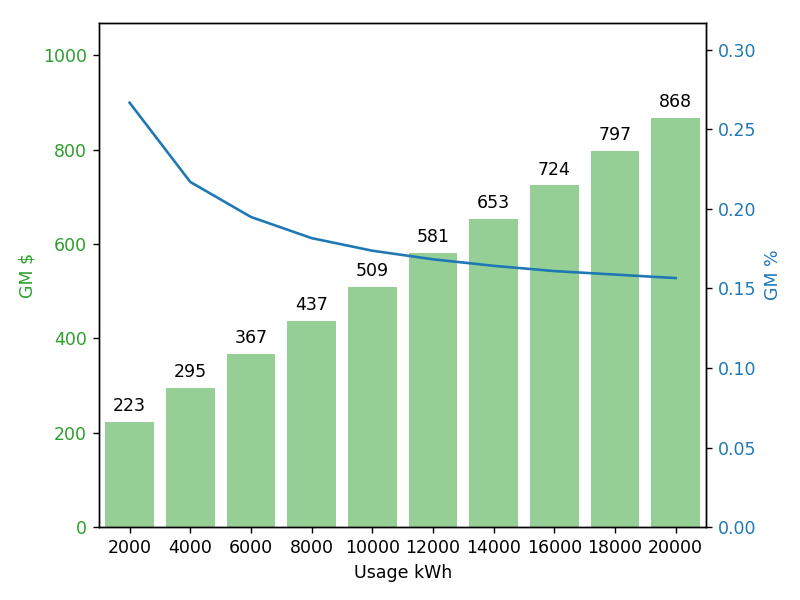

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pylab import rcParams
from IPython.display import Image

# Set up visuals for GM $
usage = column
data1 = df.loc['GM']
data2 = df.loc['GM Perc']
barWidth = 0.9
data3 = data1+data2
fig, ax1 = plt.subplots()

color1 = 'tab:green'

ax1.set_xlabel('Usage kWh')
ax1.set_ylabel('GM $', color=color1)
ax1.tick_params(axis='y', labelcolor=color1)
ax1.set_ylim([0,max(data1) + 200])
ax1.bar(np.arange(len(usage)), data1, align ='center',alpha=0.5,color=color1)


#Set up visuals for GM %
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color2 = 'tab:blue'
ax2.set_ylabel('GM %', color=color2)  # we already handled the x-label with ax1
ax2.plot(np.arange(len(usage)), data2, color=color2)
ax2.tick_params(axis='y', labelcolor=color2)
ax3 = plt.gca()
ax3.set_xlim([-.5,9.5])
ax3.set_ylim([0,max(data2) + 0.05])
rcParams['figure.figsize'] = 7, 5
fig.tight_layout()  # otherwise the right y-label is slightly clipped
fig.savefig('my_figure.png')
Image('my_figure.png')

#Label GM $ Data
for p in ax1.patches[:]:
    h = p.get_height()
    x = p.get_x()+p.get_width()/2.
    if h != 0:
        ax1.annotate("%g" % p.get_height(), xy=(x,h), xytext=(0,4), rotation=0, 
                   textcoords="offset points", ha="center", va="bottom")
plt.xticks(np.arange(len(usage)),usage)
plt.show()

# EA011

In [11]:
NetworkRevenue1 = round(ea011RetailFixed2019/100*365 + Usage1 * ResidentialPeakPercent * (ea011RetailVariablePeak2019/100) + Usage1 * ResidentialShoulderPercent * (ea011RetailVariableShoulder2019/100) + Usage1 * ResidentialOffpeakPercent * (ea011RetailVariableOffpeak2019/100),0)
NetworkRevenue2 = round(ea011RetailFixed2019/100*365 + Usage2 * ResidentialPeakPercent * (ea011RetailVariablePeak2019/100) + Usage2 * ResidentialShoulderPercent * (ea011RetailVariableShoulder2019/100) + Usage2 * ResidentialOffpeakPercent * (ea011RetailVariableOffpeak2019/100),0)
NetworkRevenue3 = round(ea011RetailFixed2019/100*365 + Usage3 * ResidentialPeakPercent * (ea011RetailVariablePeak2019/100) + Usage3 * ResidentialShoulderPercent * (ea011RetailVariableShoulder2019/100) + Usage3 * ResidentialOffpeakPercent * (ea011RetailVariableOffpeak2019/100),0)
NetworkRevenue4 = round(ea011RetailFixed2019/100*365 + Usage4 * ResidentialPeakPercent * (ea011RetailVariablePeak2019/100) + Usage4 * ResidentialShoulderPercent * (ea011RetailVariableShoulder2019/100) + Usage4 * ResidentialOffpeakPercent * (ea011RetailVariableOffpeak2019/100),0)
NetworkRevenue5 = round(ea011RetailFixed2019/100*365 + Usage5 * ResidentialPeakPercent * (ea011RetailVariablePeak2019/100) + Usage5 * ResidentialShoulderPercent * (ea011RetailVariableShoulder2019/100) + Usage5 * ResidentialOffpeakPercent * (ea011RetailVariableOffpeak2019/100),0)
NetworkRevenue6 = round(ea011RetailFixed2019/100*365 + Usage6 * ResidentialPeakPercent * (ea011RetailVariablePeak2019/100) + Usage6 * ResidentialShoulderPercent * (ea011RetailVariableShoulder2019/100) + Usage6 * ResidentialOffpeakPercent * (ea011RetailVariableOffpeak2019/100),0)
NetworkRevenue7 = round(ea011RetailFixed2019/100*365 + Usage7 * ResidentialPeakPercent * (ea011RetailVariablePeak2019/100) + Usage7 * ResidentialShoulderPercent * (ea011RetailVariableShoulder2019/100) + Usage7 * ResidentialOffpeakPercent * (ea011RetailVariableOffpeak2019/100),0)
NetworkRevenue8 = round(ea011RetailFixed2019/100*365 + Usage8 * ResidentialPeakPercent * (ea011RetailVariablePeak2019/100) + Usage8 * ResidentialShoulderPercent * (ea011RetailVariableShoulder2019/100) + Usage8 * ResidentialOffpeakPercent * (ea011RetailVariableOffpeak2019/100),0)
NetworkRevenue9 = round(ea011RetailFixed2019/100*365 + Usage9 * ResidentialPeakPercent * (ea011RetailVariablePeak2019/100) + Usage9 * ResidentialShoulderPercent * (ea011RetailVariableShoulder2019/100) + Usage9 * ResidentialOffpeakPercent * (ea011RetailVariableOffpeak2019/100),0)
NetworkRevenue10 = round(ea011RetailFixed2019/100*365 + Usage10 * ResidentialPeakPercent * (ea011RetailVariablePeak2019/100) + Usage10 * ResidentialShoulderPercent * (ea011RetailVariableShoulder2019/100) + Usage10 * ResidentialOffpeakPercent * (ea011RetailVariableOffpeak2019/100),0)
NetworkCost1 = round(ea011NAC2019/100*365 + Usage1 * ResidentialPeakPercent * (ea011NetworkVariablePeak2019/100) + Usage1 * ResidentialShoulderPercent * (ea011NetworkVariableShoulder2019/100) + Usage1 * ResidentialOffpeakPercent * (ea011NetworkVariableOffpeak2019/100),0)
NetworkCost2 = round(ea011NAC2019/100*365 + Usage2 * ResidentialPeakPercent * (ea011NetworkVariablePeak2019/100) + Usage2 * ResidentialShoulderPercent * (ea011NetworkVariableShoulder2019/100) + Usage2 * ResidentialOffpeakPercent * (ea011NetworkVariableOffpeak2019/100),0)
NetworkCost3 = round(ea011NAC2019/100*365 + Usage3 * ResidentialPeakPercent * (ea011NetworkVariablePeak2019/100) + Usage3 * ResidentialShoulderPercent * (ea011NetworkVariableShoulder2019/100) + Usage3 * ResidentialOffpeakPercent * (ea011NetworkVariableOffpeak2019/100),0)
NetworkCost4 = round(ea011NAC2019/100*365 + Usage4 * ResidentialPeakPercent * (ea011NetworkVariablePeak2019/100) + Usage4 * ResidentialShoulderPercent * (ea011NetworkVariableShoulder2019/100) + Usage4 * ResidentialOffpeakPercent * (ea011NetworkVariableOffpeak2019/100),0)
NetworkCost5 = round(ea011NAC2019/100*365 + Usage5 * ResidentialPeakPercent * (ea011NetworkVariablePeak2019/100) + Usage5 * ResidentialShoulderPercent * (ea011NetworkVariableShoulder2019/100) + Usage5 * ResidentialOffpeakPercent * (ea011NetworkVariableOffpeak2019/100),0)
NetworkCost6 = round(ea011NAC2019/100*365 + Usage6 * ResidentialPeakPercent * (ea011NetworkVariablePeak2019/100) + Usage6 * ResidentialShoulderPercent * (ea011NetworkVariableShoulder2019/100) + Usage6 * ResidentialOffpeakPercent * (ea011NetworkVariableOffpeak2019/100),0)
NetworkCost7 = round(ea011NAC2019/100*365 + Usage7 * ResidentialPeakPercent * (ea011NetworkVariablePeak2019/100) + Usage7 * ResidentialShoulderPercent * (ea011NetworkVariableShoulder2019/100) + Usage7 * ResidentialOffpeakPercent * (ea011NetworkVariableOffpeak2019/100),0)
NetworkCost8 = round(ea011NAC2019/100*365 + Usage8 * ResidentialPeakPercent * (ea011NetworkVariablePeak2019/100) + Usage8 * ResidentialShoulderPercent * (ea011NetworkVariableShoulder2019/100) + Usage8 * ResidentialOffpeakPercent * (ea011NetworkVariableOffpeak2019/100),0)
NetworkCost9 = round(ea011NAC2019/100*365 + Usage9 * ResidentialPeakPercent * (ea011NetworkVariablePeak2019/100) + Usage9 * ResidentialShoulderPercent * (ea011NetworkVariableShoulder2019/100) + Usage9 * ResidentialOffpeakPercent * (ea011NetworkVariableOffpeak2019/100),0)
NetworkCost10 = round(ea011NAC2019/100*365 + Usage10 * ResidentialPeakPercent * (ea011NetworkVariablePeak2019/100) + Usage10 * ResidentialShoulderPercent * (ea011NetworkVariableShoulder2019/100) + Usage10 * ResidentialOffpeakPercent * (ea011NetworkVariableOffpeak2019/100),0)
WholesaleCost1 = round((Usage1/1000) * (WholesaleFlex2019 + NEM2019) * TLF2019 * DLF2019,0)
WholesaleCost2 = round((Usage2/1000) * (WholesaleFlex2019 + NEM2019) * TLF2019 * DLF2019,0)
WholesaleCost3 = round((Usage3/1000) * (WholesaleFlex2019 + NEM2019) * TLF2019 * DLF2019,0)
WholesaleCost4 = round((Usage4/1000) * (WholesaleFlex2019 + NEM2019) * TLF2019 * DLF2019,0)
WholesaleCost5 = round((Usage5/1000) * (WholesaleFlex2019 + NEM2019) * TLF2019 * DLF2019,0)
WholesaleCost6 = round((Usage6/1000) * (WholesaleFlex2019 + NEM2019) * TLF2019 * DLF2019,0)
WholesaleCost7 = round((Usage7/1000) * (WholesaleFlex2019 + NEM2019) * TLF2019 * DLF2019,0)
WholesaleCost8 = round((Usage8/1000) * (WholesaleFlex2019 + NEM2019) * TLF2019 * DLF2019,0)
WholesaleCost9 = round((Usage9/1000) * (WholesaleFlex2019 + NEM2019) * TLF2019 * DLF2019,0)
WholesaleCost10 = round((Usage10/1000) * (WholesaleFlex2019 + NEM2019) * TLF2019 * DLF2019,0)
GreensCost1 = round(((Usage1/1000) * (LRECCompliance * LRECPrice) * TLF2019 * DLF2019) + ((Usage1/1000) * (SRECCompliance * STCPrice) * TLF2019 * DLF2019) + ((Usage1/1000) * (ESCCompliance * ESCPrice) * TLF2019 * DLF2019),0)
GreensCost2 = round(((Usage2/1000) * (LRECCompliance * LRECPrice) * TLF2019 * DLF2019) + ((Usage2/1000) * (SRECCompliance * STCPrice) * TLF2019 * DLF2019) + ((Usage2/1000) * (ESCCompliance * ESCPrice) * TLF2019 * DLF2019),0)
GreensCost3 = round(((Usage3/1000) * (LRECCompliance * LRECPrice) * TLF2019 * DLF2019) + ((Usage3/1000) * (SRECCompliance * STCPrice) * TLF2019 * DLF2019) + ((Usage3/1000) * (ESCCompliance * ESCPrice) * TLF2019 * DLF2019),0)
GreensCost4 = round(((Usage4/1000) * (LRECCompliance * LRECPrice) * TLF2019 * DLF2019) + ((Usage4/1000) * (SRECCompliance * STCPrice) * TLF2019 * DLF2019) + ((Usage4/1000) * (ESCCompliance * ESCPrice) * TLF2019 * DLF2019),0)
GreensCost5 = round(((Usage5/1000) * (LRECCompliance * LRECPrice) * TLF2019 * DLF2019) + ((Usage5/1000) * (SRECCompliance * STCPrice) * TLF2019 * DLF2019) + ((Usage5/1000) * (ESCCompliance * ESCPrice) * TLF2019 * DLF2019),0)
GreensCost6 = round(((Usage6/1000) * (LRECCompliance * LRECPrice) * TLF2019 * DLF2019) + ((Usage6/1000) * (SRECCompliance * STCPrice) * TLF2019 * DLF2019) + ((Usage6/1000) * (ESCCompliance * ESCPrice) * TLF2019 * DLF2019),0)
GreensCost7 = round(((Usage7/1000) * (LRECCompliance * LRECPrice) * TLF2019 * DLF2019) + ((Usage7/1000) * (SRECCompliance * STCPrice) * TLF2019 * DLF2019) + ((Usage7/1000) * (ESCCompliance * ESCPrice) * TLF2019 * DLF2019),0)
GreensCost8 = round(((Usage8/1000) * (LRECCompliance * LRECPrice) * TLF2019 * DLF2019) + ((Usage8/1000) * (SRECCompliance * STCPrice) * TLF2019 * DLF2019) + ((Usage8/1000) * (ESCCompliance * ESCPrice) * TLF2019 * DLF2019),0)
GreensCost9 = round(((Usage9/1000) * (LRECCompliance * LRECPrice) * TLF2019 * DLF2019) + ((Usage9/1000) * (SRECCompliance * STCPrice) * TLF2019 * DLF2019) + ((Usage9/1000) * (ESCCompliance * ESCPrice) * TLF2019 * DLF2019),0)
GreensCost10 = round(((Usage10/1000) * (LRECCompliance * LRECPrice) * TLF2019 * DLF2019) + ((Usage10/1000) * (SRECCompliance * STCPrice) * TLF2019 * DLF2019) + ((Usage10/1000) * (ESCCompliance * ESCPrice) * TLF2019 * DLF2019),0)


###EA011###
# Create the initial dataframe
data = [NetworkRevenue1,NetworkRevenue2,NetworkRevenue3,NetworkRevenue4,NetworkRevenue5,NetworkRevenue6,NetworkRevenue7,NetworkRevenue8,NetworkRevenue9,NetworkRevenue10]
df = pd.DataFrame(columns=column)
df.loc['Revenue'] = [NetworkRevenue1,NetworkRevenue2,NetworkRevenue3,NetworkRevenue4,NetworkRevenue5,NetworkRevenue6,NetworkRevenue7,NetworkRevenue8,NetworkRevenue9,NetworkRevenue10]
df.loc['Network'] = [-NetworkCost1,-NetworkCost2,-NetworkCost3,-NetworkCost4,-NetworkCost5,-NetworkCost6,-NetworkCost7,-NetworkCost8,-NetworkCost9,-NetworkCost10]
df.loc['Wholesale'] = [-WholesaleCost1,-WholesaleCost2,-WholesaleCost3,-WholesaleCost4,-WholesaleCost5,-WholesaleCost6,-WholesaleCost7,-WholesaleCost8,-WholesaleCost9,-WholesaleCost10]
df.loc['Greens'] = [-GreensCost1,-GreensCost2,-GreensCost3,-GreensCost4,-GreensCost5,-GreensCost6,-GreensCost7,-GreensCost8,-GreensCost9,-GreensCost10]
df.loc['GM'] = df.sum()
df.loc['GM Perc'] = round(df.loc['GM']/df.loc['Revenue'],4)
df

,2000,4000,6000,8000,10000,12000,14000,16000,18000,20000
Revenue,894.0000,1402.0000,1911.0000,2419.0000,2928.0000,3436.0000,3945.0000,4453.0000,4962.0000,5470.0000
Network,-352.0000,-492.0000,-631.0000,-771.0000,-911.0000,-1051.0000,-1190.0000,-1330.0000,-1470.0000,-1610.0000
Wholesale,-258.0000,-516.0000,-774.0000,-1033.0000,-1291.0000,-1549.0000,-1807.0000,-2065.0000,-2323.0000,-2581.0000
Greens,-29.0000,-58.0000,-87.0000,-117.0000,-146.0000,-175.0000,-204.0000,-233.0000,-262.0000,-292.0000
GM,255.0000,336.0000,419.0000,498.0000,580.0000,661.0000,744.0000,825.0000,907.0000,987.0000
GM Perc,0.2852,0.2397,0.2193,0.2059,0.1981,0.1924,0.1886,0.1853,0.1828,0.1804


<IPython.core.display.Javascript object>


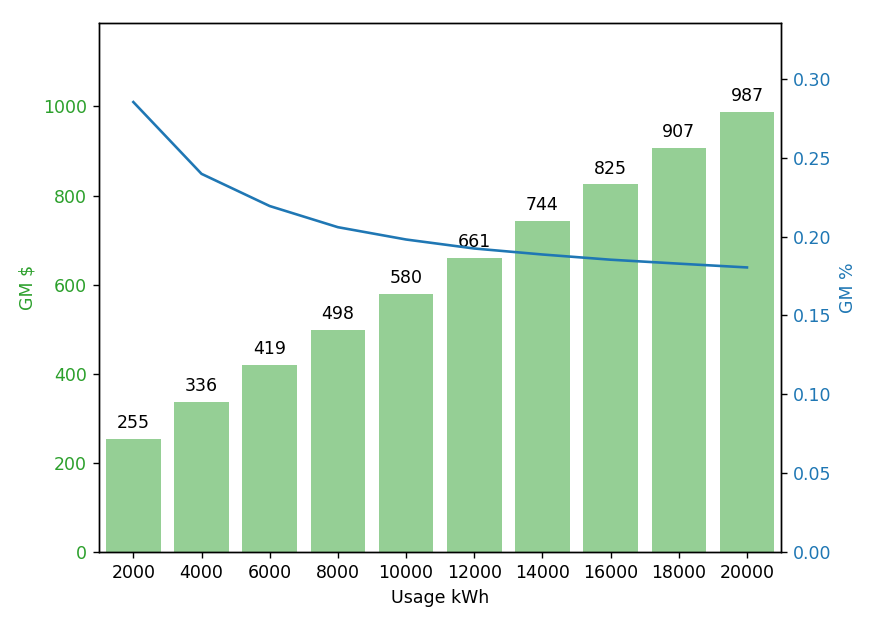

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from pylab import rcParams
from IPython.display import Image

# Set up visuals for GM $
usage = column
data1 = df.loc['GM']
data2 = df.loc['GM Perc']

fig, ax1 = plt.subplots()

color1 = 'tab:green'

ax1.set_xlabel('Usage kWh')
ax1.set_ylabel('GM $', color=color1)
ax1.tick_params(axis='y', labelcolor=color1)
ax1.set_ylim([0,max(data1) + 200])
ax1.bar(np.arange(len(usage)), data1, align ='center',alpha=0.5,color=color1)

#Set up visuals for GM %
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color2 = 'tab:blue'
ax2.set_ylabel('GM %', color=color2)  # we already handled the x-label with ax1
ax2.plot(np.arange(len(usage)), data2, color=color2)
ax2.tick_params(axis='y', labelcolor=color2)
ax3 = plt.gca()
ax3.set_xlim([-.5,9.5])
ax3.set_ylim([0,max(data2) + 0.05])
rcParams['figure.figsize'] = 7, 5
fig.tight_layout()  # otherwise the right y-label is slightly clipped
fig.savefig('my_figure.png')
Image('my_figure.png')

#Label GM $ Data
for p in ax1.patches[:]:
    h = p.get_height()
    x = p.get_x()+p.get_width()/2.
    if h != 0:
        ax1.annotate("%g" % p.get_height(), xy=(x,h), xytext=(0,4), rotation=0, 
                   textcoords="offset points", ha="center", va="bottom")
plt.xticks(np.arange(len(usage)),usage)
plt.show()



# EA025

In [13]:
NetworkRevenue1 = round(ea025RetailFixed2019/100*365 + Usage1 * ResidentialPeakPercent * (ea025RetailVariablePeak2019/100) + Usage1 * ResidentialShoulderPercent * (ea025RetailVariableShoulder2019/100) + Usage1 * ResidentialOffpeakPercent * (ea025RetailVariableOffpeak2019/100),0)
NetworkRevenue2 = round(ea025RetailFixed2019/100*365 + Usage2 * ResidentialPeakPercent * (ea025RetailVariablePeak2019/100) + Usage2 * ResidentialShoulderPercent * (ea025RetailVariableShoulder2019/100) + Usage2 * ResidentialOffpeakPercent * (ea025RetailVariableOffpeak2019/100),0)
NetworkRevenue3 = round(ea025RetailFixed2019/100*365 + Usage3 * ResidentialPeakPercent * (ea025RetailVariablePeak2019/100) + Usage3 * ResidentialShoulderPercent * (ea025RetailVariableShoulder2019/100) + Usage3 * ResidentialOffpeakPercent * (ea025RetailVariableOffpeak2019/100),0)
NetworkRevenue4 = round(ea025RetailFixed2019/100*365 + Usage4 * ResidentialPeakPercent * (ea025RetailVariablePeak2019/100) + Usage4 * ResidentialShoulderPercent * (ea025RetailVariableShoulder2019/100) + Usage4 * ResidentialOffpeakPercent * (ea025RetailVariableOffpeak2019/100),0)
NetworkRevenue5 = round(ea025RetailFixed2019/100*365 + Usage5 * ResidentialPeakPercent * (ea025RetailVariablePeak2019/100) + Usage5 * ResidentialShoulderPercent * (ea025RetailVariableShoulder2019/100) + Usage5 * ResidentialOffpeakPercent * (ea025RetailVariableOffpeak2019/100),0)
NetworkRevenue6 = round(ea025RetailFixed2019/100*365 + Usage6 * ResidentialPeakPercent * (ea025RetailVariablePeak2019/100) + Usage6 * ResidentialShoulderPercent * (ea025RetailVariableShoulder2019/100) + Usage6 * ResidentialOffpeakPercent * (ea025RetailVariableOffpeak2019/100),0)
NetworkRevenue7 = round(ea025RetailFixed2019/100*365 + Usage7 * ResidentialPeakPercent * (ea025RetailVariablePeak2019/100) + Usage7 * ResidentialShoulderPercent * (ea025RetailVariableShoulder2019/100) + Usage7 * ResidentialOffpeakPercent * (ea025RetailVariableOffpeak2019/100),0)
NetworkRevenue8 = round(ea025RetailFixed2019/100*365 + Usage8 * ResidentialPeakPercent * (ea025RetailVariablePeak2019/100) + Usage8 * ResidentialShoulderPercent * (ea025RetailVariableShoulder2019/100) + Usage8 * ResidentialOffpeakPercent * (ea025RetailVariableOffpeak2019/100),0)
NetworkRevenue9 = round(ea025RetailFixed2019/100*365 + Usage9 * ResidentialPeakPercent * (ea025RetailVariablePeak2019/100) + Usage9 * ResidentialShoulderPercent * (ea025RetailVariableShoulder2019/100) + Usage9 * ResidentialOffpeakPercent * (ea025RetailVariableOffpeak2019/100),0)
NetworkRevenue10 = round(ea025RetailFixed2019/100*365 + Usage10 * ResidentialPeakPercent * (ea025RetailVariablePeak2019/100) + Usage10 * ResidentialShoulderPercent * (ea025RetailVariableShoulder2019/100) + Usage10 * ResidentialOffpeakPercent * (ea025RetailVariableOffpeak2019/100),0)
NetworkCost1 = round(ea025NAC2019/100*365 + Usage1 * ResidentialPeakPercent * (ea025NetworkVariablePeak2019/100) + Usage1 * ResidentialShoulderPercent * (ea025NetworkVariableShoulder2019/100) + Usage1 * ResidentialOffpeakPercent * (ea025NetworkVariableOffpeak2019/100),0)
NetworkCost2 = round(ea025NAC2019/100*365 + Usage2 * ResidentialPeakPercent * (ea025NetworkVariablePeak2019/100) + Usage2 * ResidentialShoulderPercent * (ea025NetworkVariableShoulder2019/100) + Usage2 * ResidentialOffpeakPercent * (ea025NetworkVariableOffpeak2019/100),0)
NetworkCost3 = round(ea025NAC2019/100*365 + Usage3 * ResidentialPeakPercent * (ea025NetworkVariablePeak2019/100) + Usage3 * ResidentialShoulderPercent * (ea025NetworkVariableShoulder2019/100) + Usage3 * ResidentialOffpeakPercent * (ea025NetworkVariableOffpeak2019/100),0)
NetworkCost4 = round(ea025NAC2019/100*365 + Usage4 * ResidentialPeakPercent * (ea025NetworkVariablePeak2019/100) + Usage4 * ResidentialShoulderPercent * (ea025NetworkVariableShoulder2019/100) + Usage4 * ResidentialOffpeakPercent * (ea025NetworkVariableOffpeak2019/100),0)
NetworkCost5 = round(ea025NAC2019/100*365 + Usage5 * ResidentialPeakPercent * (ea025NetworkVariablePeak2019/100) + Usage5 * ResidentialShoulderPercent * (ea025NetworkVariableShoulder2019/100) + Usage5 * ResidentialOffpeakPercent * (ea025NetworkVariableOffpeak2019/100),0)
NetworkCost6 = round(ea025NAC2019/100*365 + Usage6 * ResidentialPeakPercent * (ea025NetworkVariablePeak2019/100) + Usage6 * ResidentialShoulderPercent * (ea025NetworkVariableShoulder2019/100) + Usage6 * ResidentialOffpeakPercent * (ea025NetworkVariableOffpeak2019/100),0)
NetworkCost7 = round(ea025NAC2019/100*365 + Usage7 * ResidentialPeakPercent * (ea025NetworkVariablePeak2019/100) + Usage7 * ResidentialShoulderPercent * (ea025NetworkVariableShoulder2019/100) + Usage7 * ResidentialOffpeakPercent * (ea025NetworkVariableOffpeak2019/100),0)
NetworkCost8 = round(ea025NAC2019/100*365 + Usage8 * ResidentialPeakPercent * (ea025NetworkVariablePeak2019/100) + Usage8 * ResidentialShoulderPercent * (ea025NetworkVariableShoulder2019/100) + Usage8 * ResidentialOffpeakPercent * (ea025NetworkVariableOffpeak2019/100),0)
NetworkCost9 = round(ea025NAC2019/100*365 + Usage9 * ResidentialPeakPercent * (ea025NetworkVariablePeak2019/100) + Usage9 * ResidentialShoulderPercent * (ea025NetworkVariableShoulder2019/100) + Usage9 * ResidentialOffpeakPercent * (ea025NetworkVariableOffpeak2019/100),0)
NetworkCost10 = round(ea025NAC2019/100*365 + Usage10 * ResidentialPeakPercent * (ea025NetworkVariablePeak2019/100) + Usage10 * ResidentialShoulderPercent * (ea025NetworkVariableShoulder2019/100) + Usage10 * ResidentialOffpeakPercent * (ea025NetworkVariableOffpeak2019/100),0)
WholesaleCost1 = round((Usage1/1000) * (WholesaleFlex2019 + NEM2019) * TLF2019 * DLF2019,0)
WholesaleCost2 = round((Usage2/1000) * (WholesaleFlex2019 + NEM2019) * TLF2019 * DLF2019,0)
WholesaleCost3 = round((Usage3/1000) * (WholesaleFlex2019 + NEM2019) * TLF2019 * DLF2019,0)
WholesaleCost4 = round((Usage4/1000) * (WholesaleFlex2019 + NEM2019) * TLF2019 * DLF2019,0)
WholesaleCost5 = round((Usage5/1000) * (WholesaleFlex2019 + NEM2019) * TLF2019 * DLF2019,0)
WholesaleCost6 = round((Usage6/1000) * (WholesaleFlex2019 + NEM2019) * TLF2019 * DLF2019,0)
WholesaleCost7 = round((Usage7/1000) * (WholesaleFlex2019 + NEM2019) * TLF2019 * DLF2019,0)
WholesaleCost8 = round((Usage8/1000) * (WholesaleFlex2019 + NEM2019) * TLF2019 * DLF2019,0)
WholesaleCost9 = round((Usage9/1000) * (WholesaleFlex2019 + NEM2019) * TLF2019 * DLF2019,0)
WholesaleCost10 = round((Usage10/1000) * (WholesaleFlex2019 + NEM2019) * TLF2019 * DLF2019,0)
GreensCost1 = round(((Usage1/1000) * (LRECCompliance * LRECPrice) * TLF2019 * DLF2019) + ((Usage1/1000) * (SRECCompliance * STCPrice) * TLF2019 * DLF2019) + ((Usage1/1000) * (ESCCompliance * ESCPrice) * TLF2019 * DLF2019),0)
GreensCost2 = round(((Usage2/1000) * (LRECCompliance * LRECPrice) * TLF2019 * DLF2019) + ((Usage2/1000) * (SRECCompliance * STCPrice) * TLF2019 * DLF2019) + ((Usage2/1000) * (ESCCompliance * ESCPrice) * TLF2019 * DLF2019),0)
GreensCost3 = round(((Usage3/1000) * (LRECCompliance * LRECPrice) * TLF2019 * DLF2019) + ((Usage3/1000) * (SRECCompliance * STCPrice) * TLF2019 * DLF2019) + ((Usage3/1000) * (ESCCompliance * ESCPrice) * TLF2019 * DLF2019),0)
GreensCost4 = round(((Usage4/1000) * (LRECCompliance * LRECPrice) * TLF2019 * DLF2019) + ((Usage4/1000) * (SRECCompliance * STCPrice) * TLF2019 * DLF2019) + ((Usage4/1000) * (ESCCompliance * ESCPrice) * TLF2019 * DLF2019),0)
GreensCost5 = round(((Usage5/1000) * (LRECCompliance * LRECPrice) * TLF2019 * DLF2019) + ((Usage5/1000) * (SRECCompliance * STCPrice) * TLF2019 * DLF2019) + ((Usage5/1000) * (ESCCompliance * ESCPrice) * TLF2019 * DLF2019),0)
GreensCost6 = round(((Usage6/1000) * (LRECCompliance * LRECPrice) * TLF2019 * DLF2019) + ((Usage6/1000) * (SRECCompliance * STCPrice) * TLF2019 * DLF2019) + ((Usage6/1000) * (ESCCompliance * ESCPrice) * TLF2019 * DLF2019),0)
GreensCost7 = round(((Usage7/1000) * (LRECCompliance * LRECPrice) * TLF2019 * DLF2019) + ((Usage7/1000) * (SRECCompliance * STCPrice) * TLF2019 * DLF2019) + ((Usage7/1000) * (ESCCompliance * ESCPrice) * TLF2019 * DLF2019),0)
GreensCost8 = round(((Usage8/1000) * (LRECCompliance * LRECPrice) * TLF2019 * DLF2019) + ((Usage8/1000) * (SRECCompliance * STCPrice) * TLF2019 * DLF2019) + ((Usage8/1000) * (ESCCompliance * ESCPrice) * TLF2019 * DLF2019),0)
GreensCost9 = round(((Usage9/1000) * (LRECCompliance * LRECPrice) * TLF2019 * DLF2019) + ((Usage9/1000) * (SRECCompliance * STCPrice) * TLF2019 * DLF2019) + ((Usage9/1000) * (ESCCompliance * ESCPrice) * TLF2019 * DLF2019),0)
GreensCost10 = round(((Usage10/1000) * (LRECCompliance * LRECPrice) * TLF2019 * DLF2019) + ((Usage10/1000) * (SRECCompliance * STCPrice) * TLF2019 * DLF2019) + ((Usage10/1000) * (ESCCompliance * ESCPrice) * TLF2019 * DLF2019),0)


###EA025###
# Create the initial dataframe
data = [NetworkRevenue1,NetworkRevenue2,NetworkRevenue3,NetworkRevenue4,NetworkRevenue5,NetworkRevenue6,NetworkRevenue7,NetworkRevenue8,NetworkRevenue9,NetworkRevenue10]
df = pd.DataFrame(columns=column)
df.loc['Revenue'] = [NetworkRevenue1,NetworkRevenue2,NetworkRevenue3,NetworkRevenue4,NetworkRevenue5,NetworkRevenue6,NetworkRevenue7,NetworkRevenue8,NetworkRevenue9,NetworkRevenue10]
df.loc['Network'] = [-NetworkCost1,-NetworkCost2,-NetworkCost3,-NetworkCost4,-NetworkCost5,-NetworkCost6,-NetworkCost7,-NetworkCost8,-NetworkCost9,-NetworkCost10]
df.loc['Wholesale'] = [-WholesaleCost1,-WholesaleCost2,-WholesaleCost3,-WholesaleCost4,-WholesaleCost5,-WholesaleCost6,-WholesaleCost7,-WholesaleCost8,-WholesaleCost9,-WholesaleCost10]
df.loc['Greens'] = [-GreensCost1,-GreensCost2,-GreensCost3,-GreensCost4,-GreensCost5,-GreensCost6,-GreensCost7,-GreensCost8,-GreensCost9,-GreensCost10]
df.loc['GM'] = df.sum()
df.loc['GM Perc'] = round(df.loc['GM']/df.loc['Revenue'],4)
df


,2000,4000,6000,8000,10000,12000,14000,16000,18000,20000
Revenue,862.0000,1358.0000,1855.0000,2352.0000,2848.0000,3345.0000,3841.0000,4338.0000,4835.0000,5331.0000
Network,-353.0000,-493.0000,-632.0000,-772.0000,-911.0000,-1051.0000,-1190.0000,-1330.0000,-1469.0000,-1608.0000
Wholesale,-258.0000,-516.0000,-774.0000,-1033.0000,-1291.0000,-1549.0000,-1807.0000,-2065.0000,-2323.0000,-2581.0000
Greens,-29.0000,-58.0000,-87.0000,-117.0000,-146.0000,-175.0000,-204.0000,-233.0000,-262.0000,-292.0000
GM,222.0000,291.0000,362.0000,430.0000,500.0000,570.0000,640.0000,710.0000,781.0000,850.0000
GM Perc,0.2575,0.2143,0.1951,0.1828,0.1756,0.1704,0.1666,0.1637,0.1615,0.1594


<IPython.core.display.Javascript object>


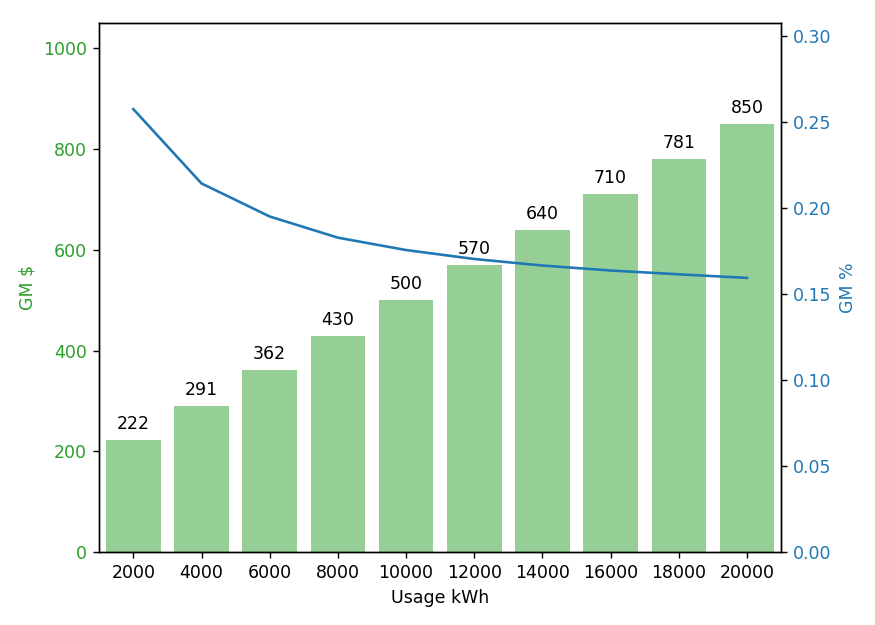

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from pylab import rcParams
from IPython.display import Image

# Set up visuals for GM $
usage = column
data1 = df.loc['GM']
data2 = df.loc['GM Perc']

fig, ax1 = plt.subplots()

color1 = 'tab:green'

ax1.set_xlabel('Usage kWh')
ax1.set_ylabel('GM $', color=color1)
ax1.tick_params(axis='y', labelcolor=color1)
ax1.set_ylim([0,max(data1) + 200])
ax1.bar(np.arange(len(usage)), data1, align ='center',alpha=0.5,color=color1)

#Set up visuals for GM %
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color2 = 'tab:blue'
ax2.set_ylabel('GM %', color=color2)  # we already handled the x-label with ax1
ax2.plot(np.arange(len(usage)), data2, color=color2)
ax2.tick_params(axis='y', labelcolor=color2)
ax3 = plt.gca()
ax3.set_xlim([-.5,9.5])
ax3.set_ylim([0,max(data2) + 0.05])
rcParams['figure.figsize'] = 7, 5
fig.tight_layout()  # otherwise the right y-label is slightly clipped
fig.savefig('my_figure.png')
Image('my_figure.png')

#Label GM $ Data
for p in ax1.patches[:]:
    h = p.get_height()
    x = p.get_x()+p.get_width()/2.
    if h != 0:
        ax1.annotate("%g" % p.get_height(), xy=(x,h), xytext=(0,4), rotation=0, 
                   textcoords="offset points", ha="center", va="bottom")
plt.xticks(np.arange(len(usage)),usage)
plt.show()

In [15]:
from bokeh.plotting import figure, output_notebook, show
from bokeh.models import ColumnDataSource, CustomJS

output_notebook()




Loading BokehJS ...

In [16]:
x = [2, 3, 5, 6, 8, 7]
y = [6, 4, 3, 8, 7, 5]


In [17]:
p = figure(width=400, height=400, tools="hover", toolbar_location=None, title='Hovering over point:')

In [18]:
cr = p.circle(x, y, color='olive', radius=1, alpha=0.4, hover_color='olive', hover_alpha=1.0)

In [19]:
callback = CustomJS(args={'title': p.title}, code="""
    const indices = cb_data.index.indices;
    title.text = 'Hovering over points: ' + indices
""")

p.hover.tooltips=None
p.hover.callback=callback

In [20]:

show(p)

In [21]:
from ipywidgets import IntProgress
from IPython.display import display
import time

max_count = 100

f = IntProgress(min=0, max=max_count) # instantiate the bar
display(f) # display the bar

count = 0
while count <= max_count:
    f.value += 1 # signal to increment the progress bar
    time.sleep(.1)
    count += 1

IntProgress(value=0)